##  Introduction


## Table of Contents

1. [Data Description](#1-Data-Description)<br>
2. [Data Preparation](#2-Data-preparation)<br>
   2.1. [Data Cleaning](#21-Data-cleaning)<br>
   2.2. [Data Categorization and Transformation](#22-Data-categorization-and-transformation)<br>
   2.3. [Dealing with outliers](#23-Dealing-with-outliers)<br>
   2.4. [Feature Engineering](#24-Feature-engineering)<br>
3. [Data Visualization](#3-Data-visualization)<br>
4. [Modeling](#4-Modeling)<br>
   4.1. [Train-Test Split](#41-Train-test-split)<br>
   4.2. [Model training and testing](#42-Model-training-and-testing)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.1. [Logistic Regression](#421-Logistic-regression)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.2. [Random Forest](#422-Random-forest)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.3. [XGBoost](#423-XGBoost)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.4. [LightGBM](#424-LightGBM)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.5. [CatBoost](#425-CatBoost)<br>
5. [Model Performance Comparison](#5-Model-performance-comparison)<br>

## 1. Data Description

- Collected from 130 hospitals in the U.S. during 10 years(1999-2008)
- Contains 101,766 observations and 50 features
- Description and values of the features can be found in Research Article
- The following table shows a quick overview of the features' name and types
image.png

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [7]:
# Load dataset
pd.options.display.max_columns = None
df = pd.read_csv('/Users/mady/Library/Mobile Documents/com~apple~CloudDocs/DS project/readmission-prediction/data/diabetic_data.csv')
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 101766 │ │ string      │ 37    │                                                          │
│ │ Number of columns │ 50     │ │ int64       │ 13    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃          ┃           ┃       ┃          ┃          ┃           ┃          ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean     ┃ sd        ┃ p0    ┃ p25      ┃ p50      ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ encounter │  0 │    0 │ 16520000 │ 102600000 │ 12520 │ 84960000 │ 15240000 │ 230300000 │ 44390000 │ ▆▇▇▅▂▂ │  │
│ │ _id       │    │      │        0 │           │       │          │        0 │           │        0 │        │  │
│ │ patient_n │  0 │    0 │ 54330000 │  38700000 │   135 │ 23410000 │ 45510000 │  87550000 │ 18950000 │  ▇▅▅▃  │  │
│ │ br        │    │      │          │           │       │          │          │           │        0 │        │  │
│ │ admission │  0 │    0 │    2.024 │     1.445 │     1 │        1 │        1 │         3 │        8 │ ▇▂ ▁▁  │  │
│ │ _type_id  │    │      │          │           │       │          │          │           │          │        │  │
│ │ discharge │  0 │    0 │    3.716 │      5.28 │     1 │        1 │        1 │         4 │       28 │   ▇▁   │  │
│ │ _disposit │    │      │          │           │       │          │          │           │          │        │  │
│ │ ion_id    │    │      │          │           │       │          │          │           │          │        │  │
│ │ admission │  0 │    0 │    5.754 │     4.064 │     1 │        1 │        7 │         7 │       25 │ ▅▇  ▁  │  │
│ │ _source_i │    │      │          │           │       │          │          │           │          │        │  │
│ │ d         │    │      │          │           │       │          │          │           │          │        │  │
│ │ time_in_h │  0 │    0 │    4.396 │     2.985 │     1 │        2 │        4 │         6 │       14 │ ▇▃▂▁▁▁ │  │
│ │ ospital   │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_lab_p │  0 │    0 │     43.1 │     19.67 │     1 │       31 │       44 │        57 │      132 │  ▃▇▇▂  │  │
│ │ rocedures │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_proce │  0 │    0 │     1.34 │     1.706 │     0 │        0 │        1 │         2 │        6 │ ▇▃▂▂▁▁ │  │
│ │ dures     │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_medic │  0 │    0 │    16.02 │     8.128 │     1 │       10 │       15 │        20 │       81 │  ▇▇▁   │  │
│ │ ations    │    │      │          │           │       │          │          │           │          │        │  │
│ │ number_ou │  0 │    0 │   0.3694 │     1.267 │     0 │        0 │        0 │         0 │       42 │   ▇    │  │
│ │ tpatient  │    │      │          │           │      

In [9]:
# Checking the number of rows and columns in the dataset
df.shape

(101766, 50)

In [10]:
# Display up to 20 unique values for each column
for col in df.columns:
    print(f"Column '{col}' has {df[col].nunique()} unique values")
    print(f"unique values: {df[col].unique()[:20]}")

Column 'encounter_id' has 101766 unique values
unique values: [2278392  149190   64410  500364   16680   35754   55842   63768   12522
   15738   28236   36900   40926   42570   62256   73578   77076   84222
   89682  148530]
Column 'patient_nbr' has 71518 unique values
unique values: [  8222157  55629189  86047875  82442376  42519267  82637451  84259809
 114882984  48330783  63555939  89869032  77391171  85504905  77586282
  49726791  86328819  92519352 108662661 107389323  69422211]
Column 'race' has 6 unique values
unique values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Column 'gender' has 3 unique values
unique values: ['Female' 'Male' 'Unknown/Invalid']
Column 'age' has 10 unique values
unique values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Column 'weight' has 10 unique values
unique values: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Colum

## 2. Data Preparation
### 2.1. Data Cleaning

#### 2.1.1 Dealing with Missing Values

In [11]:
# Create a df showing percentage of missing values from each column
## Missing values are represented as NA, '?', 'Unknown/Invalid'
missing_values = df.isin(['NA', '?', 'Unknown/Invalid']).sum() / df.shape[0] * 100
missing_values.sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
gender                       0.002948
troglitazone                 0.000000
miglitol                     0.000000
encounter_id                 0.000000
acarbose                     0.000000
tolazamide                   0.000000
pioglitazone                 0.000000
tolbutamide                  0.000000
glyburide                    0.000000
rosiglitazone                0.000000
insulin                      0.000000
examide                      0.000000
citoglipton                  0.000000
acetohexamide                0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change      

__"examide"__ and __"citoglipton"__ are dropped because they only have one value, hence does not contribute to model prediction.

In [12]:
df.drop(columns=['examide', 'citoglipton'], inplace=True)

__"weight"__, __"medical_specialty"__ and __"payer_code"__ are missing 97%, 49% and 40% of the data, respectively. These columns are dropped because of the high percentage of missing values, hence poor interpretability and lack of predictive power.

In [13]:
# Drop Weight, Medical_Specialty and Payer_Code columns
df.drop(columns=['weight', 'medical_specialty', 'payer_code'], inplace=True)

Drop __"encounter_id"__ and keep __"patient_id"__ as it is a unique identifier for each patient that might have multiple encounters.

In [14]:
df.drop(columns=['encounter_id'], inplace=True)

__"diag_2"__ and __"diag_3"__ are dropped because we already have __"diag_1"__ which is the primary diagnosis.

In [15]:
df.drop(columns=['diag_2', 'diag_3'], inplace=True)

Then drop the row of small percentage of missing values in __"race"__, __"gender"__, and  __"diag_1"__.

In [16]:
# Replace '?', 'Unknown/Invalid' with NA
df.replace(['?', 'Unknown/Invalid'], np.nan, inplace=True)
# Drop rows with missing values in "diag_1"
df.dropna(subset=['diag_1', 'race', 'gender'], inplace=True)
# Check the number of rows after dropping
df.shape

(99473, 42)

#### 2.1.2 Dealing with duplicates

The dataset contained multiple inpatient visits for some patients and the observations could not be considered as statistically independent because that bias to patients with multiple encounters. Hence one encounter per patient; in particular, only the first encounter for each patient as the primary admission and determined whether or not they were readmitted within 30 days.

In [17]:
# Drop duplicates based on patient number, keeping only the first encounter
df.drop_duplicates(subset=['patient_nbr'], keep='first', inplace=True)
# Check the number of rows after dropping
df.shape

(69658, 42)

### 2.2 Data Categorization and Transformation


__"diag_1"__ has 717 unique values representing that are difficult to interpret. These values represent icd9 codes that can be mapped to 19 different categories based on this research paper.

In [18]:
icd9_to_category = {
    'Circulatory': [str(i) for i in range(390, 460)] + ['785'],
    'Respiratory': [str(i) for i in range(460, 520)] + ['786'],
    'Digestive': [str(i) for i in range(520, 580)] + ['787'],
    'Diabetes': ['250'],
    'Injury': [str(i) for i in range(800, 1000)],
    'Musculoskeletal': [str(i) for i in range(710, 740)],
    'Genitourinary': [str(i) for i in range(580, 630)] + ['788'],
    'Neoplasms': [str(i) for i in range(140, 240)],
    'Other': ['780', '781', '784'] + [str(i) for i in range(790, 800)] + 
             [str(i) for i in range(240, 280) if i != 250] + ['782'] + 
             [str(i) for i in range(1, 140)] + [str(i) for i in range(290, 320)] + 
             ['E', 'V'] + [str(i) for i in range(280, 290)] + [str(i) for i in range(320, 360)] + 
             [str(i) for i in range(630, 680)] + [str(i) for i in range(360, 390)] + 
             [str(i) for i in range(740, 760)]
}

# Function to map ICD-9 code to category
def map_icd9_to_category(icd9_code):
    if pd.isna(icd9_code):
        return 'Unknown'
    for category, codes in icd9_to_category.items():
        if any(icd9_code.startswith(code) for code in codes):
            return category
    return 'Unknown'

# Apply the function to the "diag_1" column
df['diagnosis'] = df['diag_1'].apply(map_icd9_to_category)

# Check the result
print(df['diagnosis'].value_counts())

diagnosis
Circulatory        21325
Other              11994
Respiratory         9536
Digestive           6422
Diabetes            5656
Injury              4648
Musculoskeletal     3962
Genitourinary       3443
Neoplasms           2672
Name: count, dtype: int64


- Age <br>
Create age as numerical value rather than categorical buy using median of each bin

In [19]:
# Convert age to numerical value using the median of each bin
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age'] = df['age'].map(age_mapping)

- Outcome Variable <br>
The outcome variable indicates whether a patient is readmitted to the hospital within 30 days. Originally categorized as < 30, > 30, and No Readmission, it was simplified to a binary classification. Given the primary interest in factors leading to early readmission, the outcome is defined with two values: 1 for patients readmitted within 30 days of discharge, and 0 encompassing both readmission after 30 days and no readmission.

In [20]:
df['readmitted'] = df['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0})

In [21]:
df['readmitted'].value_counts()

readmitted
0    63493
1     6165
Name: count, dtype: int64

Several features with numerous unique values will be consolidated into broader categories 
to reduce complexity and improve model interpretability.

In [22]:
# Indentify features with many unique values
for col in df.columns:
    if df[col].nunique() > 10:
        print(f"Column '{col}' has {df[col].nunique()} unique values")
        print(f"unique values: {df[col].unique()[:20]}")

Column 'patient_nbr' has 69658 unique values
unique values: [  8222157  55629189  86047875  82442376  42519267  82637451  84259809
 114882984  48330783  63555939  89869032  77391171  85504905  77586282
  49726791  86328819  92519352 108662661 107389323  63000108]
Column 'discharge_disposition_id' has 26 unique values
unique values: [25  1  3  6  2  5 11  7 10 14  4 18  8 12 13 17 16 22 23  9]
Column 'admission_source_id' has 17 unique values
unique values: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Column 'time_in_hospital' has 14 unique values
unique values: [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
Column 'num_lab_procedures' has 116 unique values
unique values: [41 59 11 44 51 31 70 73 68 33 47 62 60 55 49 75 45 29 35 42]
Column 'num_medications' has 75 unique values
unique values: [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22]
Column 'number_outpatient' has 33 unique values
unique values: [ 0  2  1  5  7  3  8  4 12  9 11  6 20 15 10 13 14 16 21 35]
Colum

- Admission type <br>
Admission type can be collapsed to 5 categories: Emergency, Urgent, Elective, Newborn, Other

admission_type
Emergency    48102
Elective     13606
Other         7941
Newborn          9
Name: count, dtype: int64


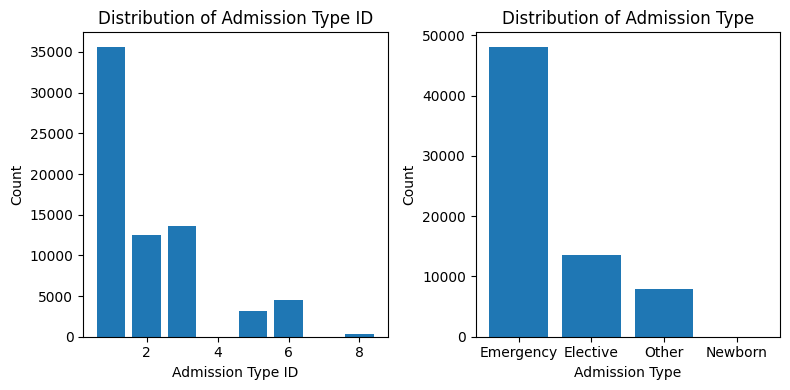

In [23]:
# Create a mapping dictionary
admission_type_mapping = {
    1: 'Emergency',
    2: 'Emergency',
    3: 'Elective',
    4: 'Newborn',
    5: 'Other',
    6: 'Other',
    7: 'Emergency',
    8: 'Other'
}

# Create a new column 'admission_type' with the mapped values
df['admission_type'] = df['admission_type_id'].map(admission_type_mapping)

# Check the result
print(df['admission_type'].value_counts())

# Create two charts of admission_type count and admission_type_id count
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(df['admission_type_id'].value_counts().index, df['admission_type_id'].value_counts())
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Distribution of Admission Type ID')

plt.subplot(1, 2, 2)
plt.bar(df['admission_type'].value_counts().index, df['admission_type'].value_counts())
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Distribution of Admission Type')

plt.tight_layout()
plt.show()

- Discharge Disposition <br>
Discharge disposition has 29 categories that can be collapsed into 3 categories: Home, Transferred, Other. Among the 29 categories, 6 categories are related to death or hospice care, which are not considered as readmitted patients, hence are excluded.

discharge_disposition
Home        51279
Transfer    13229
Other        3634
Name: count, dtype: int64
68142


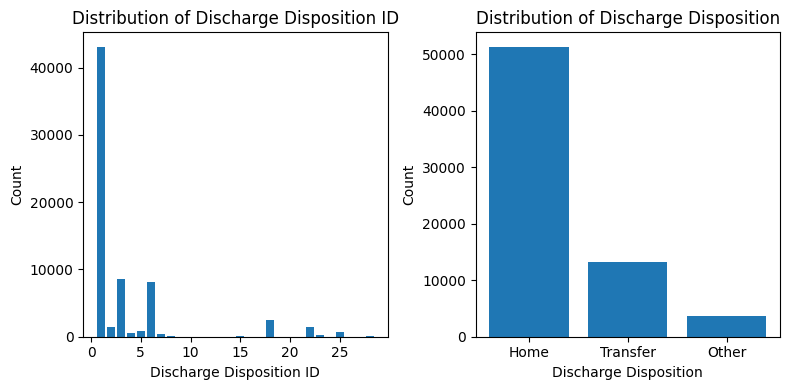

In [24]:
# Remove categories related to death or hospice care
df = df[~df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]

# Create a mapping dictionary
discharge_disposition_mapping = {
    1: 'Home',
    2: 'Transfer',
    3: 'Transfer',
    4: 'Transfer',
    5: 'Transfer',
    6: 'Home',
    7: 'Other',
    8: 'Home',
    9: 'Other',
    10: 'Other',
    12: 'Other',
    15: 'Transfer',
    16: 'Transfer',
    17: 'Transfer',
    18: 'Other',
    22: 'Transfer',
    23: 'Transfer',
    24: 'Transfer',
    25: 'Other',
    26: 'Other',
    27: 'Transfer',
    28: 'Transfer',
    29: 'Transfer',
    30: 'Transfer'
}

# Create a new column 'discharge_disposition' with the mapped values
df['discharge_disposition'] = df['discharge_disposition_id'].map(discharge_disposition_mapping)
# Check the result
print(df['discharge_disposition'].value_counts())
print(df['discharge_disposition'].value_counts().sum())

# Create a bar plot side by side of discharge_disposition_id and discharge_disposition
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(df['discharge_disposition_id'].value_counts().index, df['discharge_disposition_id'].value_counts())
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.title('Distribution of Discharge Disposition ID')

plt.subplot(1, 2, 2)
plt.bar(df['discharge_disposition'].value_counts().index, df['discharge_disposition'].value_counts())
plt.xlabel('Discharge Disposition')
plt.ylabel('Count')
plt.title('Distribution of Discharge Disposition')
plt.tight_layout()
plt.show()

- Admission source <br>
Admission source has 26 categories that can be collapsed to 4 categories: Referral, Emergency, Transfer, Other,

admission_source
Emergency    36606
Referral     22128
Other         4961
Transfer      4447
Name: count, dtype: int64
68142


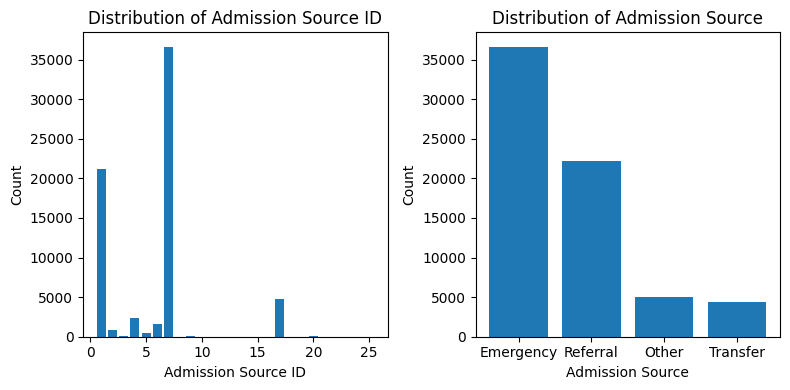

In [25]:
admission_source_mapping = {
    1: 'Referral',        # Physician Referral
    2: 'Referral',        # Clinic Referral
    3: 'Referral',        # HMO Referral
    4: 'Transfer',        # Transfer from a hospital
    5: 'Transfer',        # Transfer from a Skilled Nursing Facility (SNF)
    6: 'Transfer',        # Transfer from another health care facility
    7: 'Emergency',       # Emergency Room
    8: 'Other',           # Court/Law Enforcement
    9: 'Other',           # Not Available
    10: 'Transfer',       # Transfer from critical access hospital
    11: 'Other',          # Normal Delivery
    12: 'Other',          # Premature Delivery
    13: 'Other',          # Sick Baby
    14: 'Other',          # Extramural Birth
    15: 'Other',          # Not Available
    17: 'Other',          # NULL
    18: 'Transfer',       # Transfer From Another Home Health Agency
    19: 'Other',          # Readmission to Same Home Health Agency
    20: 'Other',          # Not Mapped
    21: 'Other',          # Unknown/Invalid
    22: 'Transfer',       # Transfer from hospital inpatient/same facility result in a separate claim
    23: 'Other',          # Born inside this hospital
    24: 'Other',          # Born outside this hospital
    25: 'Transfer',       # Transfer from Ambulatory Surgery Center
    26: 'Transfer'        # Transfer from Hospice
}

df['admission_source'] = df['admission_source_id'].map(admission_source_mapping)

# Check the result
print(df['admission_source'].value_counts())
print(df['admission_source'].value_counts().sum())

# Create a bar plot side by side of admission_source_id and admission_source
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(df['admission_source_id'].value_counts().index, df['admission_source_id'].value_counts())
plt.xlabel('Admission Source ID')
plt.ylabel('Count')
plt.title('Distribution of Admission Source ID')

plt.subplot(1, 2, 2)
plt.bar(df['admission_source'].value_counts().index, df['admission_source'].value_counts())
plt.xlabel('Admission Source')
plt.ylabel('Count')
plt.title('Distribution of Admission Source')
plt.tight_layout()
plt.show()

- Hemoglobin A1C (A1Cresult) <br>
A1C result indicates performance of diabetes care. We put the results into 3 categories: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is not in normal range.

In [26]:
# Create a mapping dictionary

a1c_mapping = {
    'Norm': 'Normal',
    '>7': 'Abnormal',
    '>8': 'Abnormal'
}

# Apply the mapping to the 'A1Cresult' column
df['HbA1C'] = df['A1Cresult'].map(a1c_mapping)
df['HbA1C'] = df['HbA1C'].fillna('None')

# Check the result

print(df['HbA1C'].value_counts())

HbA1C
None        55664
Abnormal     8805
Normal       3673
Name: count, dtype: int64


- Glucose serum (max_glu_serum)
Glucose serum also indicates performance of diabetes care. We create 3 categories: (1) no glucose test performed, (2) glucose test performed and in normal range, (3) glucose test performed and the result is not in normal range.

In [27]:
# Create a mapping dictionary for max_glu_serum
max_glu_serum_mapping = {
    'Norm': "Normal",
    '>200': "Abnormal",
    '>300': "Abnormal"
}

# Apply the mapping to the 'max_glu_serum' column
df['glucose_serum'] = df['max_glu_serum'].map(max_glu_serum_mapping)
df['glucose_serum'] = df['glucose_serum'].fillna('None')

# Check the result
print(df['glucose_serum'].value_counts())
print(df['glucose_serum'].value_counts().sum())

glucose_serum
None        64835
Normal       1681
Abnormal     1626
Name: count, dtype: int64
68142


### 2.3 Dealing with outliers

First of all, we need to check the distribution of the numerical features.

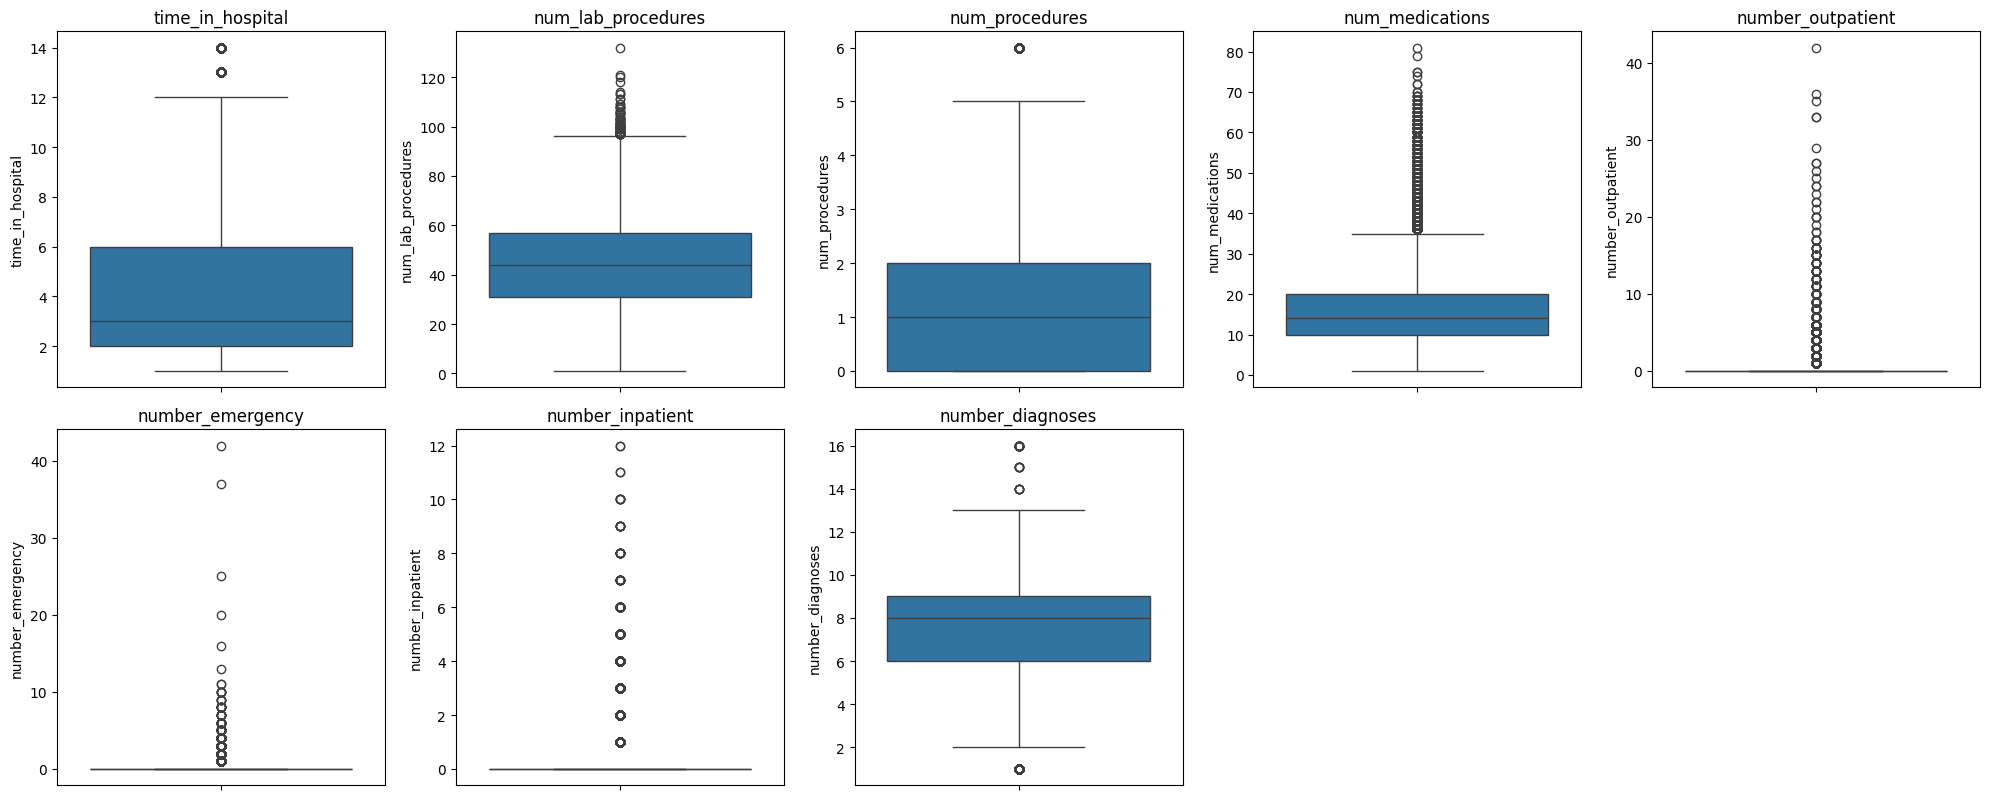

In [28]:
# Create a box plots for all the numerical features in the dataset
# Select numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient', 'number_emergency',
                      'number_inpatient', 'number_diagnoses']

# Create box plots for all numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [29]:
# Create a dataframe to calculate skewness and kurtosis of each of the numerical features 
num_stats_df = pd.DataFrame()
skew_after = []
skew_before = []
kurtosis_after = []
kurtosis_before = []
std_after = []
std_before = []
log_transformation = []

num_stats_df['feature'] = numerical_features

for feature in numerical_features:
    skewval = df[feature].skew()
    skew_before.append(skewval)
    kurtosisval = df[feature].kurtosis()
    kurtosis_before.append(kurtosisval)
    stdval = df[feature].std()
    std_before.append(stdval)
    
    if (abs(skewval) > 2) & (abs(kurtosisval) > 2):
        log_transformation.append(True)
    
        skewvalnew = np.log(df[feature] + 1).skew()
        kurtosisvalnew = np.log(df[feature] + 1).kurtosis()
        stdvalnew = np.log(df[feature] + 1).std()
        
    else:
        log_transformation.append(False)
        skewvalnew = skewval
        kurtosisvalnew = kurtosisval
        stdvalnew = stdval
    
    skew_after.append(skewvalnew)
    kurtosis_after.append(kurtosisvalnew)
    std_after.append(stdvalnew)
        
num_stats_df['skew_before'] = skew_before
num_stats_df['kurtosis_before'] = kurtosis_before
num_stats_df['std_before'] = std_before
num_stats_df['log_transformation'] = log_transformation
num_stats_df['skew_after'] = skew_after
num_stats_df['kurtosis_after'] = kurtosis_after
num_stats_df['std_after'] = std_after
    
num_stats_df.sort_values(by='skew_after', ascending=False)

,feature,skew_before,kurtosis_before,std_before,log_transformation,skew_after,kurtosis_after,std_after
5,number_emergency,21.098262,1190.317376,0.517257,True,4.224646,21.081344,0.231186
4,number_outpatient,9.658697,183.096370,1.073453,True,3.133398,10.515382,0.381816
6,number_inpatient,5.533038,46.436136,0.606541,True,3.099924,9.962189,0.298392
3,num_medications,1.431455,3.850686,8.276547,False,1.431455,3.850686,8.276547
2,num_procedures,1.226011,0.561290,1.754730,False,1.226011,0.561290,1.754730
0,time_in_hospital,1.178123,1.007748,2.934366,False,1.178123,1.007748,2.934366
1,num_lab_procedures,-0.217611,-0.302840,19.921679,False,-0.217611,-0.302840,19.921679
7,number_diagnoses,-0.747623,-0.350673,1.995511,False,-0.747623,-0.350673,1.995511


In [30]:
# Perform log transformation for log_transformation == True
df['number_emergency_log'] = df['number_emergency'].apply(lambda x: np.log(x + 1))
df['number_inpatient_log'] = df['number_inpatient'].apply(lambda x: np.log(x + 1))
df['number_outpatient_log'] = df['number_outpatient'].apply(lambda x: np.log(x + 1))

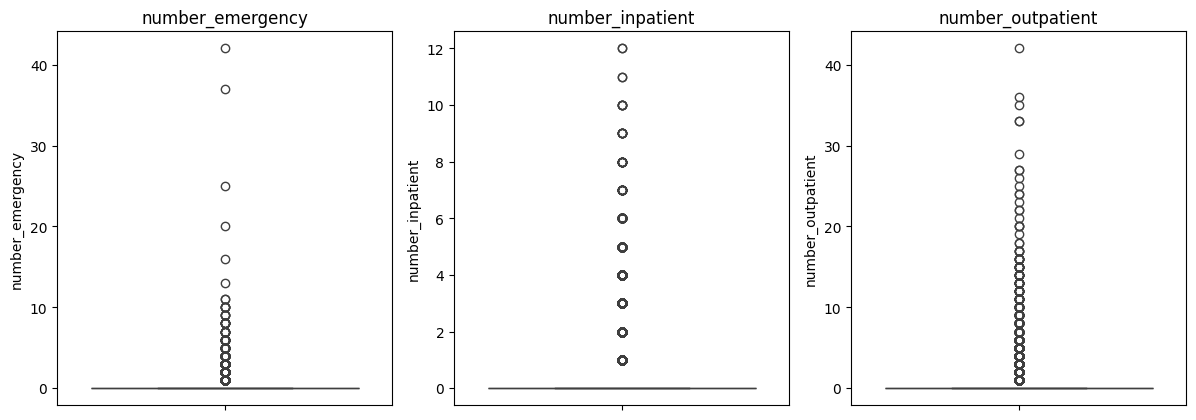

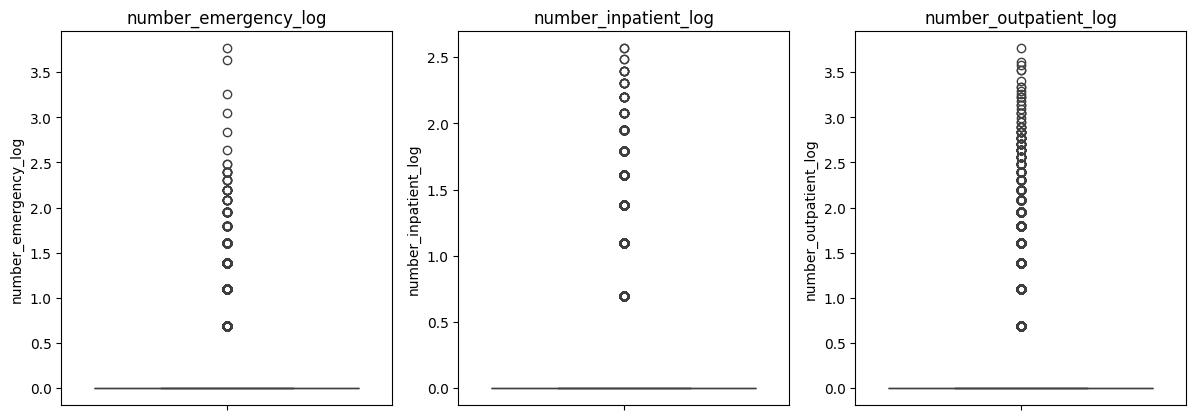

In [31]:
# Create new box plots for the numerical features after log transformation
numerical_features_before_log = ['number_emergency', 'number_inpatient', 'number_outpatient']
numerical_features_log = ['number_emergency_log', 'number_inpatient_log', 'number_outpatient_log']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features_before_log):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features_log):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


### 2.4 Feature Engineering

- Number of Medication Changes (num_med_changes) <br>

    - Dataset includes 23 features representing changes in different medications during a patient's hospital stay.
    - Research suggests medication changes for diabetics upon admission may reduce readmission rates.
    - We created a new feature counting total medication changes per patient.

In [32]:
medication_features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone', 'metformin-pioglitazone']

# Calculate the number of medication changes for each of the feature
for col in medication_features:
    colname = str(col) + '_change'
    df[colname] = df[col].apply(lambda x: 0 if x == 'No' or x == 'Steady' else 1)

df['num_med_changes'] = 0
for col in medication_features:
    colname = str(col) + '_change'
    df['num_med_changes'] += df[colname]
    del df[colname]

# Check the result
print(df['num_med_changes'].value_counts())

num_med_changes
0    51320
1    15842
2      904
3       73
4        3
Name: count, dtype: int64


In [33]:
df.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis,admission_type,discharge_disposition,admission_source,HbA1C,glucose_serum,number_emergency_log,number_inpatient_log,number_outpatient_log,num_med_changes
0,8222157,Caucasian,Female,5,6,25,1,1,41,0,1,0,0,0,250.83,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Diabetes,Other,Other,Referral,None,None,0.0,0.000000,0.000000,0
1,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,276,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,Other,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,1
2,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,648,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Other,Emergency,Home,Emergency,None,None,0.0,0.693147,1.098612,0
3,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,8,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,Other,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,1
4,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,197,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Neoplasms,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,0
5,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,414,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,Circulatory,Emergency,Home,Referral,None,None,0.0,0.000000,0.000000,0
6,84259809,Caucasian,Male,65,3,1,2,4,70,1,21,0,0,0,414,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Circulatory,Elective,Home,Referral,None,None,0.0,0.000000,0.000000,0
7,114882984,Caucasian,Male,75,1,1,7,5,73,0,12,0,0,0,428,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Circulatory,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,0
8,48330783,Caucasian,Female,85,2,1,4,13,68,2,28,0,0,0,398,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Circulatory,Emergency,Home,Transfer,None,None,0.0,0.000000,0.000000,0
9,63555939,Caucasian,Female,95,3,3,4,12,33,3,18,0,0,0,434,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Circulatory,Elective,Transfer,Transfer,None,None,0.0,0.000000,0.000000,0


### 3. Data Visualization

- Distribution of readmission

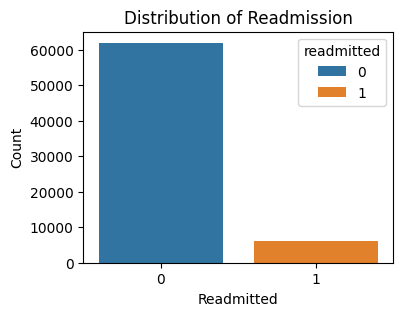

In [34]:
# Plot distribution of readmission and no
plt.figure(figsize=(4, 3))
sns.countplot(x='readmitted', data=df, hue='readmitted')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Distribution of Readmission')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68142 entries, 0 to 101765
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_nbr               68142 non-null  int64  
 1   race                      68142 non-null  object 
 2   gender                    68142 non-null  object 
 3   age                       68142 non-null  int64  
 4   admission_type_id         68142 non-null  int64  
 5   discharge_disposition_id  68142 non-null  int64  
 6   admission_source_id       68142 non-null  int64  
 7   time_in_hospital          68142 non-null  int64  
 8   num_lab_procedures        68142 non-null  int64  
 9   num_procedures            68142 non-null  int64  
 10  num_medications           68142 non-null  int64  
 11  number_outpatient         68142 non-null  int64  
 12  number_emergency          68142 non-null  int64  
 13  number_inpatient          68142 non-null  int64  
 14  diag_1    

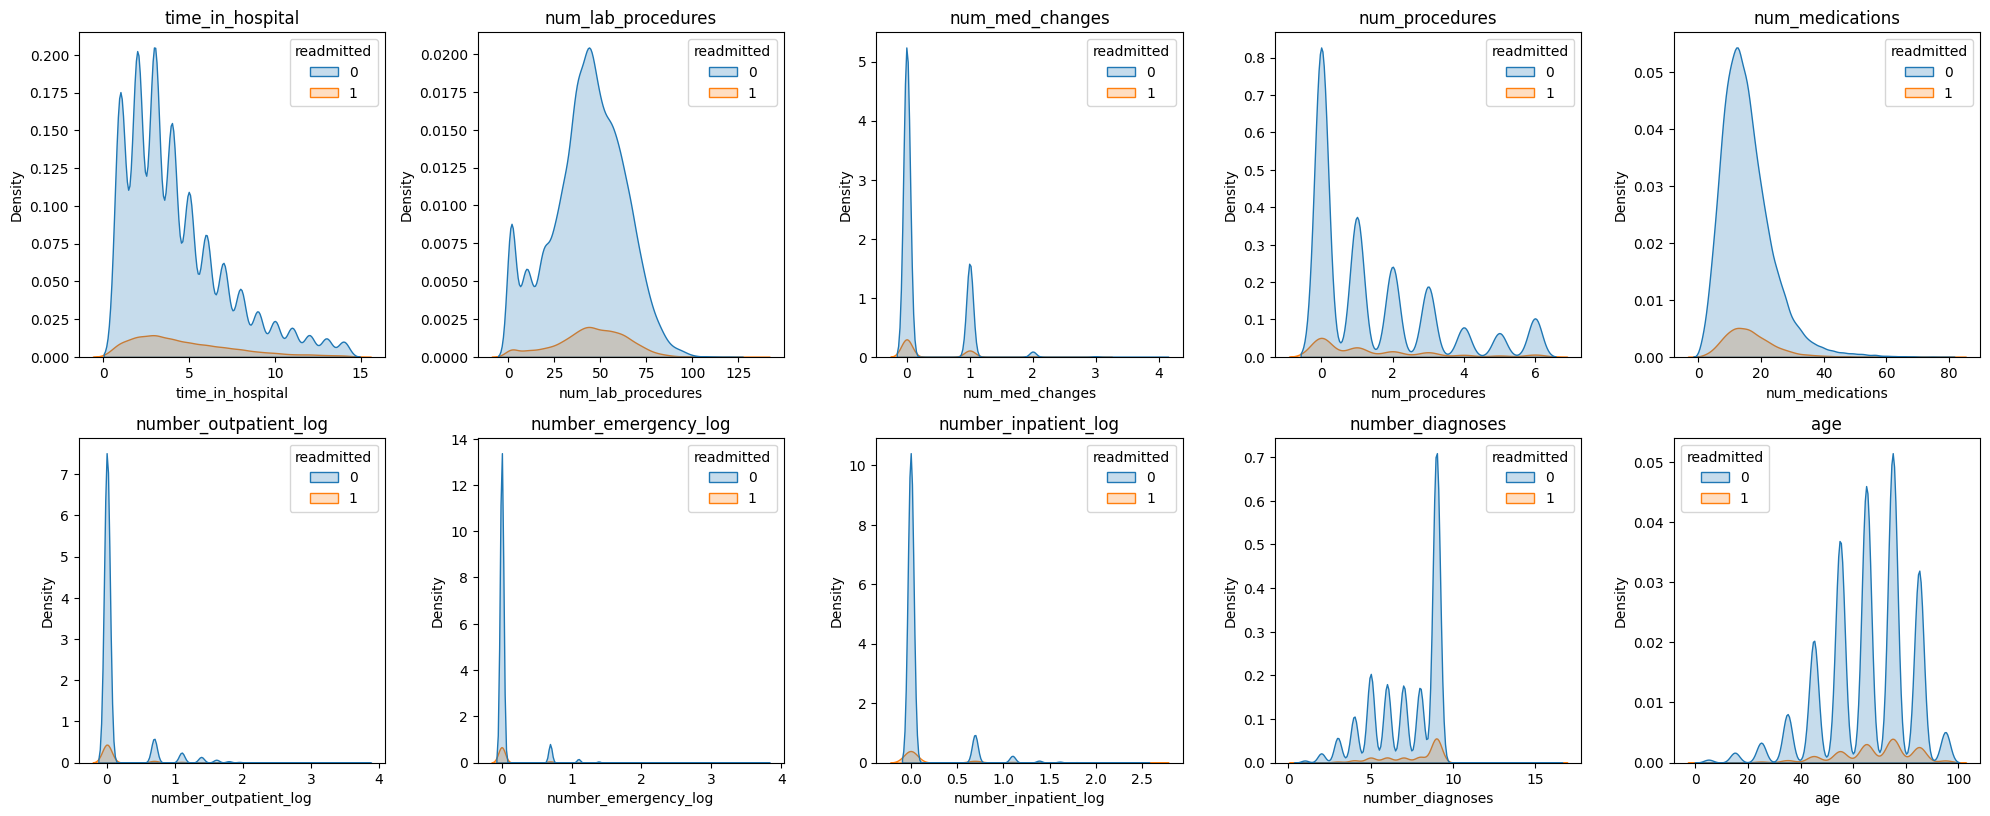

In [36]:
# Create numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_med_changes', 'num_procedures',
                      'num_medications', 'number_outpatient_log', 'number_emergency_log',
                      'number_inpatient_log', 'number_diagnoses', 'age']

# Using kdeplot explore relationship between readmission and numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.kdeplot(x=feature, hue='readmitted', data=df, fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


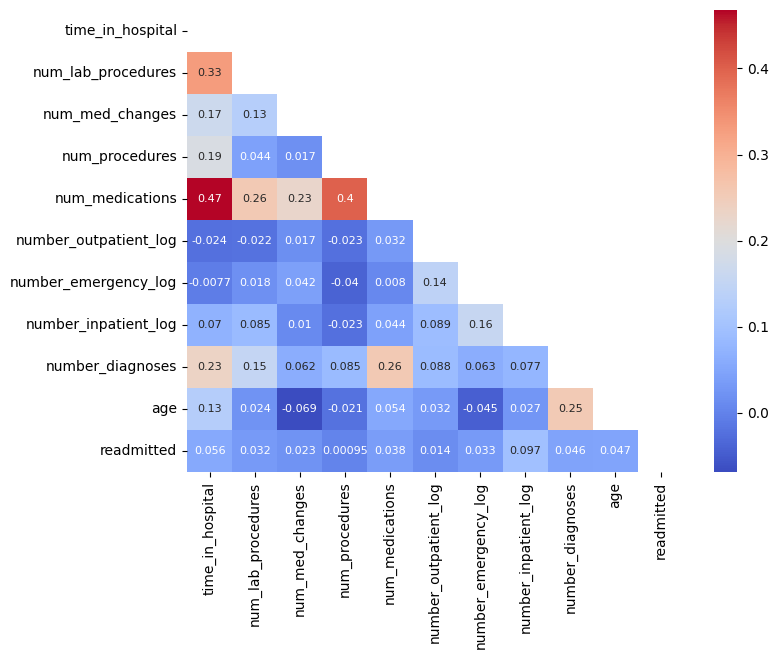

In [37]:
# Create a correlation matrix
corr_matrix = df[numerical_features + ['readmitted']].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8}, mask=mask)
plt.show()

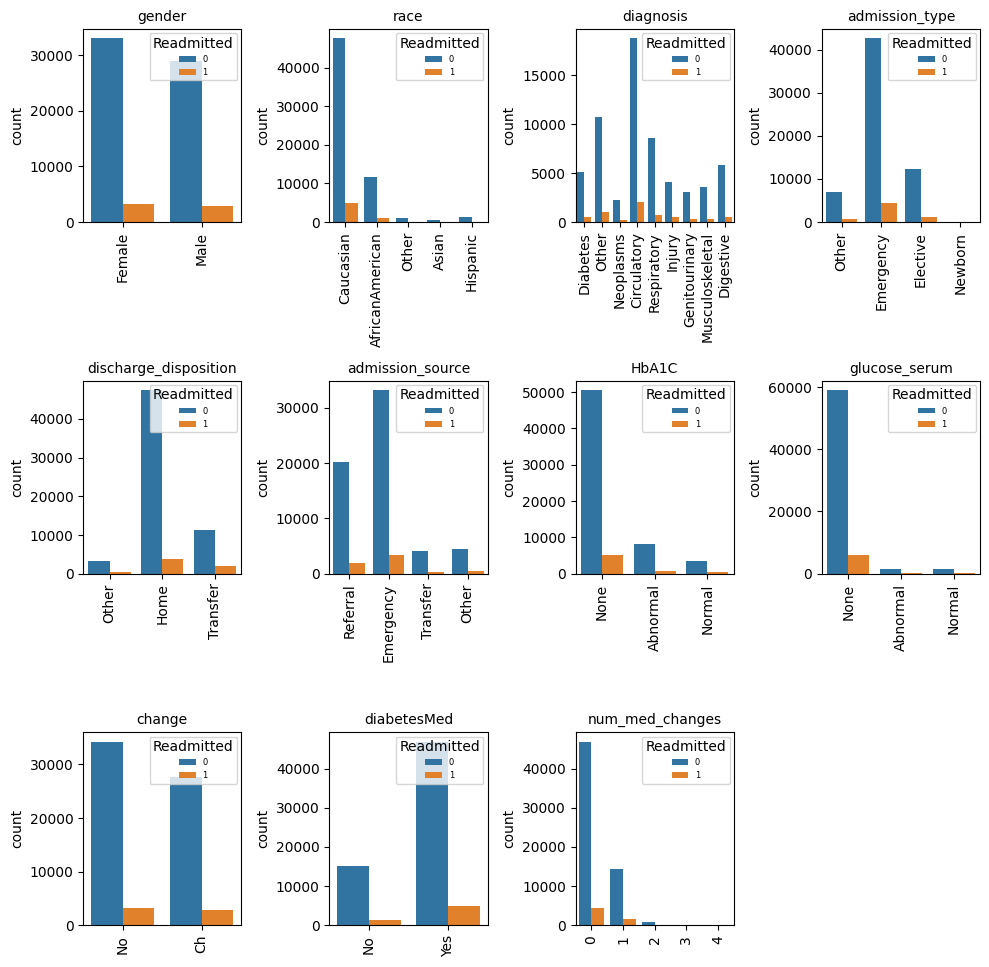

In [38]:
# Explore relationship between readmitted and non-numerical data

categorical_features = ['gender', 'race', 'diagnosis', 'admission_type', 'discharge_disposition', 'admission_source', 
                        'HbA1C', 'glucose_serum', 'change', 'diabetesMed', 'num_med_changes']

plt.figure(figsize=(10, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 4, i + 1)  # Increase the number of rows to make the charts smaller
    sns.countplot(x=feature, hue='readmitted', data=df)
    plt.title(feature, fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('')  # Remove the x axis title
    plt.legend(title='Readmitted', loc='upper right', fontsize=6)  # Make the legend smaller
plt.tight_layout()
plt.show()

### 4. Modeling


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, 
                             roc_curve, auc, recall_score, precision_score, 
                             f1_score, precision_recall_curve, average_precision_score)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from category_encoders import BinaryEncoder

#### 4.1 Train-Test Split

In [40]:
## Create DataFrame for modeling
X = df.drop(columns=['readmitted', 'admission_source_id', 'discharge_disposition_id', 'admission_type_id',
                    'A1Cresult', 'max_glu_serum', 'diag_1', 'patient_nbr'], axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
# Encoding
medication_features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone', 'metformin-pioglitazone']
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient_log', 'number_emergency_log',
                      'number_inpatient_log', 'number_diagnoses', 'age', 'num_med_changes']
categorical_features = ['race','diagnosis', 'admission_type', 'discharge_disposition', 'admission_source', 
                        'HbA1C', 'glucose_serum'] + medication_features
binary_features = ['gender', 'change', 'diabetesMed']

# Transform categorical features into one-hot encoding
categorical_encoder = OneHotEncoder(handle_unknown='ignore')
    
# Transform numerical_geatures into standardization
numerical_encoder = StandardScaler()

# Tansform binary features into binary encoding
binary_encoder = BinaryEncoder()

preprocessor = ColumnTransformer(transformers=[('binary', binary_encoder, binary_features),
                                              ('categorical', categorical_encoder, categorical_features),
                                              ('numerical', numerical_encoder, numerical_features)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#### 4.2 Model training and testing

In [42]:
# Samplers
samplers = {
    'none': None,
    'smote': SMOTE(random_state=42),
    'random_under': RandomUnderSampler(random_state=42),
    'adasyn': ADASYN(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

In [43]:
# Metrics evaluation
def calculate_metrics(y_true, y_pred, y_pred_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_pred_proba),
        "Average Precision": average_precision_score(y_true, y_pred_proba)
    }

In [44]:
# Model evaluation
def find_optimal_threshold(y_true, y_pred_proba):
    thresholds = np.arange(0, 1, 0.01)
    f1_scores = [f1_score(y_true, y_pred_proba >= threshold) for threshold in thresholds]
    return thresholds[np.argmax(f1_scores)]

    
def evaluate_model(model_name, X_train_preprocessed, y_train, X_test_preprocessed, y_test, results_df, best_params, optimal_thresholds, samplers, model_class):
    # Extract the sampler name from the model name
    sampler_name = model_name.split(' with ')[-1]
    sampler = samplers[sampler_name]

    # Get the best parameters for this model
    best_params = best_params[model_name]

    # Create the model
    model = model_class(random_state=42, **best_params)

    # Apply the sampler and fit the model
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_preprocessed, y_train)
        model.fit(X_resampled, y_resampled)
    else:
        model.fit(X_train_preprocessed, y_train)

    # Get the optimal threshold for this model
    optimal_threshold = optimal_thresholds[model_name]

    # Get predictions
    y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)

    # Print some debug information
    print(f"Model: {model_name}")
    print(f"Sampler: {sampler_name}")
    print(f"Optimal threshold: {optimal_threshold}")
    print(f"Predicted probabilities range: {y_pred_proba.min():.4f} to {y_pred_proba.max():.4f}")
    print(f"Number of positive predictions: {y_pred.sum()} out of {len(y_pred)} total")
    print(f"Number of actual positive cases: {y_test.sum()} out of {len(y_test)} total")

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)

    # Create a DataFrame with all metrics
    metrics_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc],
        'PR AUC': [pr_auc]
    })

    # Display the DataFrame
    print(f"\nPerformance Metrics for the {model_class.__name__} Model:")
    print(metrics_df.to_string(index=False, float_format='{:.4f}'.format))

    # Create a figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'{model_class.__name__} Model Performance', fontsize=16)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')

    # ROC Curve
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc="lower right")

    # Precision-Recall Curve
    ax3.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    ax3.axhline(y=sum(y_test)/len(y_test), color='red', linestyle='--', label='No Skill')
    ax3.set_xlim([0.0, 1.0])
    ax3.set_ylim([0.0, 1.05])
    ax3.set_xlabel('Recall')
    ax3.set_ylabel('Precision')
    ax3.set_title('Precision-Recall Curve')
    ax3.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    return metrics_df, model

In [45]:
## Feature importance
# Get feature names after preprocessing
def get_feature_names(column_transformer):
    feature_names = []
    
    # Binary features
    binary_encoder = column_transformer.named_transformers_['binary']
    for col in binary_encoder.cols:
        feature_names.extend([f"{col}_0", f"{col}_1"])
    
    # Categorical features
    cat_encoder = column_transformer.named_transformers_['categorical']
    feature_names.extend(cat_encoder.get_feature_names_out(categorical_features))
    
    # Numerical features
    feature_names.extend(numerical_features)
    
    return feature_names
feature_names = get_feature_names(preprocessor)

def plot_feature_importance(model, feature_names, model_name, top_n=10):
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        print(f"No feature importance available for {model_name}")
        return
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'{model_name} Feature Importance', fontsize=12)
    
    # Plot top N features
    ax1.barh(range(top_n), importances[indices[:top_n]][::-1])
    ax1.set_title(f'Top {top_n} Features', fontsize=10)
    ax1.set_xlabel('Importance', fontsize=9)
    ax1.set_yticks(range(top_n))
    ax1.set_yticklabels([feature_names[i] for i in indices[:top_n]][::-1])
    ax1.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Plot bottom N features
    ax2.barh(range(top_n), importances[indices[-top_n:]])
    ax2.set_title(f'Bottom {top_n} Features', fontsize=10)
    ax2.set_xlabel('Importance', fontsize=9)
    ax2.set_yticks(range(top_n))
    ax2.set_yticklabels([feature_names[i] for i in indices[-top_n:]])
    ax2.grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()
    
    # Print top N and bottom N feature importances
    print(f"\nTop {top_n} Features:")
    for i in indices[:top_n]:
        print(f"{feature_names[i]}: {importances[i]:.4f}")
    
    print(f"\nBottom {top_n} Features:")
    for i in indices[-top_n:]:
        print(f"{feature_names[i]}: {importances[i]:.4f}")

#### __4.2.1 Logistic Regression__

In [ ]:
## FOR Logistic Regression
results_logistic_regression = {}
best_params_logistic_regression = {}
optimal_thresholds_logistic_regression = {}

param_grid_logistic_regression = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
#    'max_iter': [1000, 2000],
 #   'tol': [1e-4, 1e-3]
}

for sampler_name, sampler in samplers.items():
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_preprocessed, y_train)
    else:
        X_resampled, y_resampled = X_train_preprocessed, y_train
    
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic_regression, cv=3, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
    
    # Find optimal threshold
    optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    results_logistic_regression[f'Tuned Model with {sampler_name}'] = calculate_metrics(y_test, y_pred, y_pred_proba)
    best_params_logistic_regression[f'Tuned Model with {sampler_name}'] = grid_search.best_params_
    optimal_thresholds_logistic_regression[f'Tuned Model with {sampler_name}'] = optimal_threshold

In [60]:
# Convert optimized results to DataFrame
results_df_logistic_regression = pd.DataFrame(results_logistic_regression).T

# Find the best model based on Average Precision
best_model = results_df_logistic_regression['Average Precision'].idxmax()

print("Results for all models (with optimized thresholds):")
print(results_df_logistic_regression)

print("\nBest Parameters and Optimal Thresholds for each model:")
for model in best_params_logistic_regression.keys():
    print(f"\n{model}:")
    print(f"  Optimal Threshold: {optimal_thresholds_logistic_regression[model]}")
    for param, value in best_params_logistic_regression[model].items():
        print(f"  {param}: {value}")

print(f"\nBest Overall Model: {best_model}")
print("Best Parameters:")
for param, value in best_params_logistic_regression[best_model].items():
    print(f"  {param}: {value}")
print(f"Optimal Threshold: {optimal_thresholds_logistic_regression[best_model]}")
print("\nBest Model Performance:")
for metric, value in results_logistic_regression[best_model].items():
    print(f"  {metric}: {value}")

Results for all models (with optimized thresholds):
                               Accuracy  Precision    Recall  F1 Score  \
Tuned Model with none          0.736958   0.154388  0.427642  0.226871   
Tuned Model with smote         0.713332   0.144300  0.441463  0.217505   
Tuned Model with random_under  0.707169   0.148996  0.476423  0.227000   
Tuned Model with adasyn        0.717294   0.143323  0.428455  0.214795   
Tuned Model with smotetomek    0.713332   0.144300  0.441463  0.217505   

                                    AUC  Average Precision  
Tuned Model with none          0.635716           0.149042  
Tuned Model with smote         0.623377           0.140813  
Tuned Model with random_under  0.635955           0.149105  
Tuned Model with adasyn        0.622089           0.139506  
Tuned Model with smotetomek    0.623389           0.140816  

Best Parameters and Optimal Thresholds for each model:

Tuned Model with none:
  Optimal Threshold: 0.11
  C: 0.1
  penalty: l1
  solver

Model: Tuned Model with random_under
Sampler: random_under
Optimal threshold: 0.53
Predicted probabilities range: 0.2473 to 0.9461
Number of positive predictions: 3933 out of 13629 total
Number of actual positive cases: 1230 out of 13629 total

Performance Metrics for the LogisticRegression Model:
 Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
   0.7072     0.1490  0.4764    0.2270   0.6360  0.1486


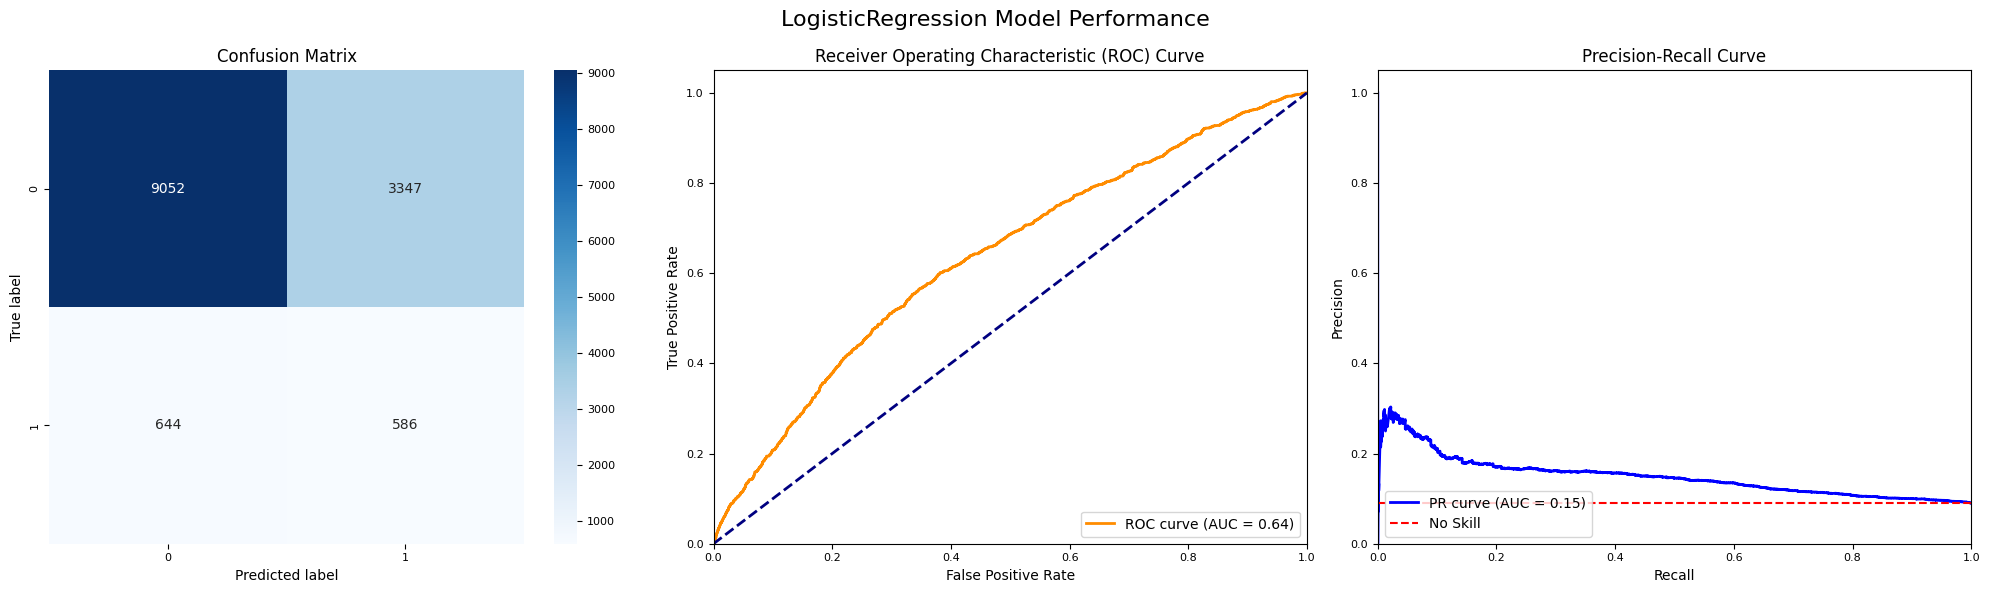

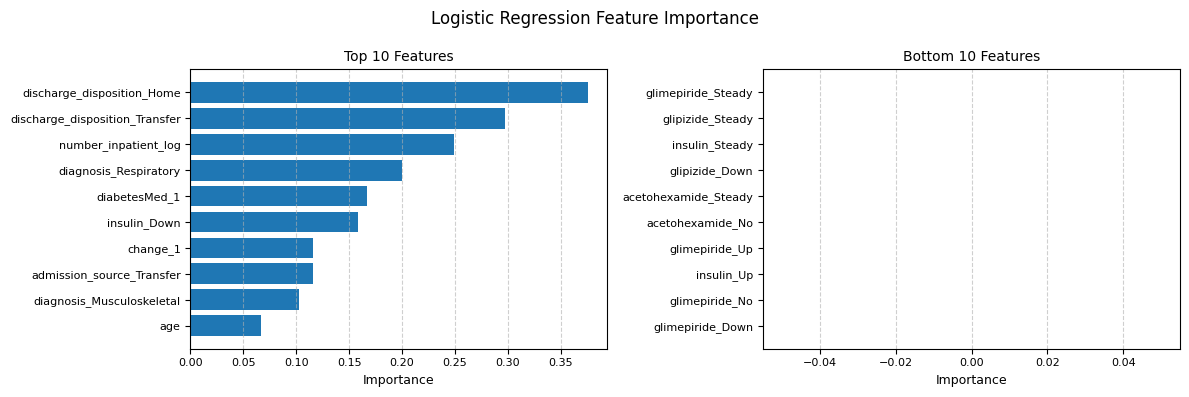


Top 10 Features:
discharge_disposition_Home: 0.3754
discharge_disposition_Transfer: 0.2975
number_inpatient_log: 0.2490
diagnosis_Respiratory: 0.2001
diabetesMed_1: 0.1667
insulin_Down: 0.1584
change_1: 0.1160
admission_source_Transfer: 0.1157
diagnosis_Musculoskeletal: 0.1029
age: 0.0669

Bottom 10 Features:
glimepiride_Down: 0.0000
glimepiride_No: 0.0000
insulin_Up: 0.0000
glimepiride_Up: 0.0000
acetohexamide_No: 0.0000
acetohexamide_Steady: 0.0000
glipizide_Down: 0.0000
insulin_Steady: 0.0000
glipizide_Steady: 0.0000
glimepiride_Steady: 0.0000


In [61]:
# Evaluate metrics for the best Logistic Regression model
metrics, best_model_fitted = evaluate_model(best_model,  
                                            X_train_preprocessed,
                                            y_train,
                                            X_test_preprocessed,
                                            y_test,
                                            results_df_logistic_regression,
                                            best_params_logistic_regression,
                                            optimal_thresholds_logistic_regression,
                                            samplers,
                                            LogisticRegression)

# Feature Importance
plot_feature_importance(best_model_fitted, feature_names, 'Logistic Regression')

#### __4.2.2. Random Forest__

In [46]:
## FOR Random Forest
results_random_forest = {}
best_params_random_forest = {}
optimal_thresholds_random_forest = {}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

for sampler_name, sampler in samplers.items():
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_preprocessed, y_train)
    else:
        X_resampled, y_resampled = X_train_preprocessed, y_train
    
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_random_forest, cv=3, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
    
    # Find optimal threshold
    optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    results_random_forest[f'Tuned Model with {sampler_name}'] = calculate_metrics(y_test, y_pred, y_pred_proba)
    best_params_random_forest[f'Tuned Model with {sampler_name}'] = grid_search.best_params_
    optimal_thresholds_random_forest[f'Tuned Model with {sampler_name}'] = optimal_threshold

In [47]:
# Convert optimized results to DataFrame
results_df_random_forest = pd.DataFrame(results_random_forest).T

# Find the best model based on Average Precision
best_model_random_forest = results_df_random_forest['Average Precision'].idxmax()

print("Results for all models (with optimized thresholds):")
print(results_df_random_forest)
print("\nBest Parameters and Optimal Thresholds for each model:")
for model in best_params_random_forest.keys():
    print(f"\n{model}:")
    print(f"  Optimal Threshold: {optimal_thresholds_random_forest[model]}")
    for param, value in best_params_random_forest[model].items():
        print(f"  {param}: {value}")

print(f"\nBest Overall Model: {best_model_random_forest}")
print("Best Parameters:")
for param, value in best_params_random_forest[best_model_random_forest].items():
    print(f"  {param}: {value}")
print(f"Optimal Threshold: {optimal_thresholds_random_forest[best_model_random_forest]}")
print("\nBest Model Performance:")
for metric, value in results_random_forest[best_model_random_forest].items():
    print(f"  {metric}: {value}")

Results for all models (with optimized thresholds):
                               Accuracy  Precision    Recall  F1 Score  \
Tuned Model with none          0.782743   0.171038  0.365854  0.233100   
Tuned Model with smote         0.684129   0.134190  0.458537  0.207620   
Tuned Model with random_under  0.786044   0.171729  0.358537  0.232227   
Tuned Model with adasyn        0.689119   0.136045  0.456911  0.209662   
Tuned Model with smotetomek    0.761024   0.148212  0.347154  0.207735   

                                    AUC  Average Precision  
Tuned Model with none          0.645213           0.154015  
Tuned Model with smote         0.612903           0.137250  
Tuned Model with random_under  0.643787           0.154666  
Tuned Model with adasyn        0.617117           0.136343  
Tuned Model with smotetomek    0.613203           0.135880  

Best Parameters and Optimal Thresholds for each model:

Tuned Model with none:
  Optimal Threshold: 0.12
  class_weight: None
  max_dept

Model: Tuned Model with random_under
Sampler: random_under
Optimal threshold: 0.5700000000000001
Predicted probabilities range: 0.2432 to 0.7818
Number of positive predictions: 2568 out of 13629 total
Number of actual positive cases: 1230 out of 13629 total

Performance Metrics for the RandomForestClassifier Model:
 Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
   0.7860     0.1717  0.3585    0.2322   0.6438  0.1541


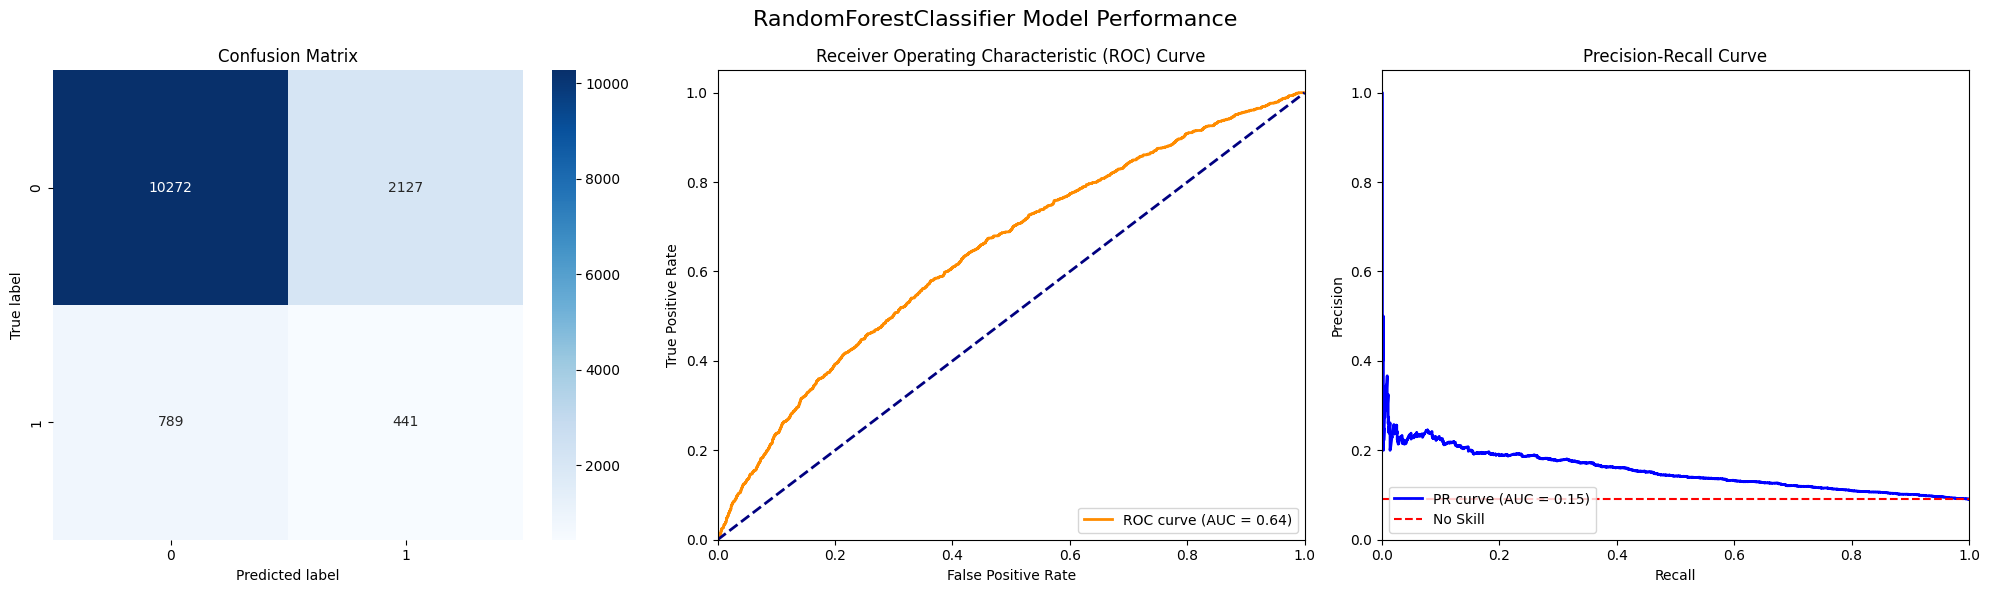

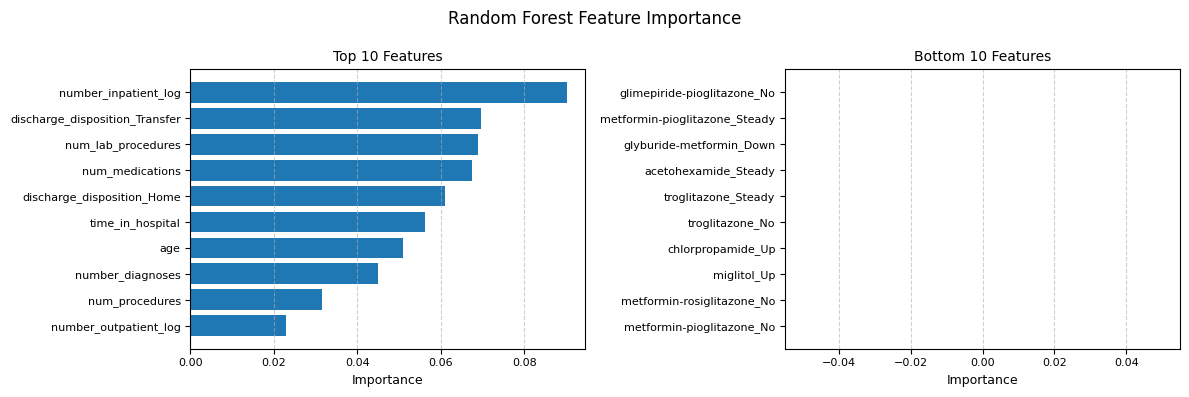


Top 10 Features:
number_inpatient_log: 0.0901
discharge_disposition_Transfer: 0.0695
num_lab_procedures: 0.0690
num_medications: 0.0676
discharge_disposition_Home: 0.0611
time_in_hospital: 0.0563
age: 0.0509
number_diagnoses: 0.0450
num_procedures: 0.0315
number_outpatient_log: 0.0230

Bottom 10 Features:
metformin-pioglitazone_No: 0.0000
metformin-rosiglitazone_No: 0.0000
miglitol_Up: 0.0000
chlorpropamide_Up: 0.0000
troglitazone_No: 0.0000
troglitazone_Steady: 0.0000
acetohexamide_Steady: 0.0000
glyburide-metformin_Down: 0.0000
metformin-pioglitazone_Steady: 0.0000
glimepiride-pioglitazone_No: 0.0000


In [48]:
# Evaluate metrics for the best Random Forest model
metrics, best_model_fitted = evaluate_model(best_model_random_forest,  
                                            X_train_preprocessed,
                                            y_train,
                                            X_test_preprocessed,
                                            y_test,
                                            results_df_random_forest,
                                            best_params_random_forest,
                                            optimal_thresholds_random_forest,
                                            samplers,
                                            RandomForestClassifier)
# Feature Importance
plot_feature_importance(best_model_fitted, feature_names, 'Random Forest')

#### __4.2.3. XGBoost__

In [49]:
## FOR XGBoost
results_xgb = {}
best_params_xgb = {}
optimal_thresholds_xgb = {}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'learning_rate': [0.01, 0.1, 0.2]
}

for sampler_name, sampler in samplers.items():
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_preprocessed, y_train)
    else:
        X_resampled, y_resampled = X_train_preprocessed, y_train
    
    grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=3, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
    
    # Find optimal threshold
    optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    results_xgb[f'Tuned Model with {sampler_name}'] = calculate_metrics(y_test, y_pred, y_pred_proba)
    best_params_xgb[f'Tuned Model with {sampler_name}'] = grid_search.best_params_
    optimal_thresholds_xgb[f'Tuned Model with {sampler_name}'] = optimal_threshold

In [50]:
#Results for optimized thresholds
results_df_xgb = pd.DataFrame(results_xgb).T

# Find the best model based on Average Precision
best_model_xgb  = results_df_xgb['Average Precision'].idxmax()

print("Results for all models (with optimized thresholds):")
print(results_df_xgb)
print("\nBest Parameters and Optimal Thresholds for each model:")
for model in best_params_xgb.keys():
    print(f"\n{model}:")
    print(f"  Optimal Threshold: {optimal_thresholds_xgb[model]}")
    
print(f"\nBest Overall Model: {best_model_xgb}")
print("Best Parameters:")
for param, value in best_params_xgb[best_model_xgb].items():
    print(f"  {param}: {value}")
print(f"Optimal Threshold: {optimal_thresholds_xgb[best_model_xgb]}")
print("\nBest Model Performance:")
for metric, value in results_xgb[best_model_xgb].items():
    print(f"  {metric}: {value}")

Results for all models (with optimized thresholds):
                               Accuracy  Precision    Recall  F1 Score  \
Tuned Model with none          0.743341   0.159255  0.430894  0.232558   
Tuned Model with smote         0.772617   0.154017  0.338211  0.211651   
Tuned Model with random_under  0.763519   0.162089  0.388618  0.228763   
Tuned Model with adasyn        0.806149   0.166667  0.286992  0.210872   
Tuned Model with smotetomek    0.722210   0.140405  0.405691  0.208612   

                                    AUC  Average Precision  
Tuned Model with none          0.645831           0.161747  
Tuned Model with smote         0.613391           0.136043  
Tuned Model with random_under  0.637311           0.148783  
Tuned Model with adasyn        0.620116           0.142653  
Tuned Model with smotetomek    0.610185           0.135994  

Best Parameters and Optimal Thresholds for each model:

Tuned Model with none:
  Optimal Threshold: 0.11

Tuned Model with smote:
  Opti

Model: Tuned Model with none
Sampler: none
Optimal threshold: 0.11
Predicted probabilities range: 0.0263 to 0.5983
Number of positive predictions: 3328 out of 13629 total
Number of actual positive cases: 1230 out of 13629 total

Performance Metrics for the XGBClassifier Model:
 Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
   0.7433     0.1593  0.4309    0.2326   0.6458  0.1612


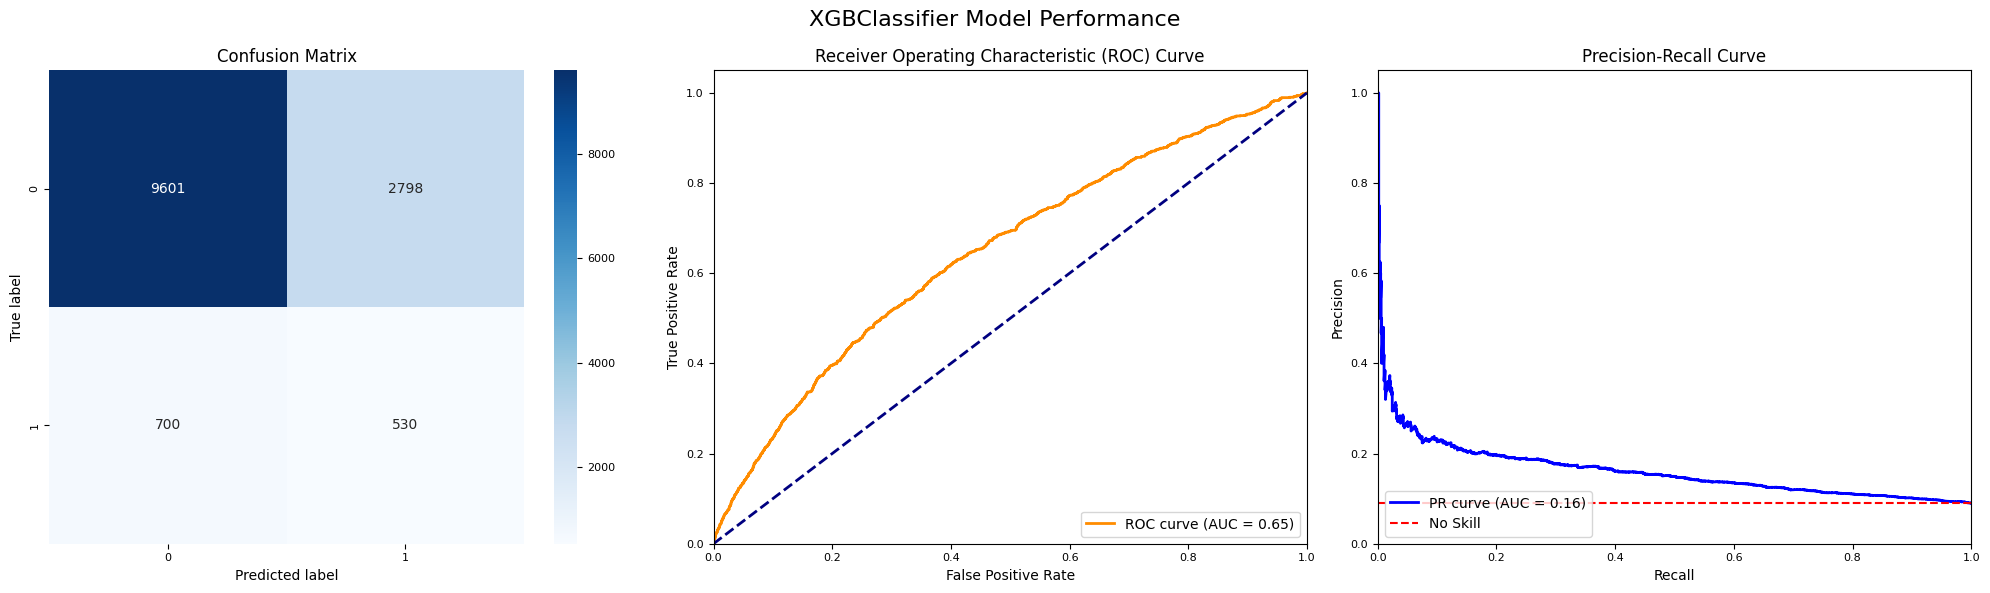

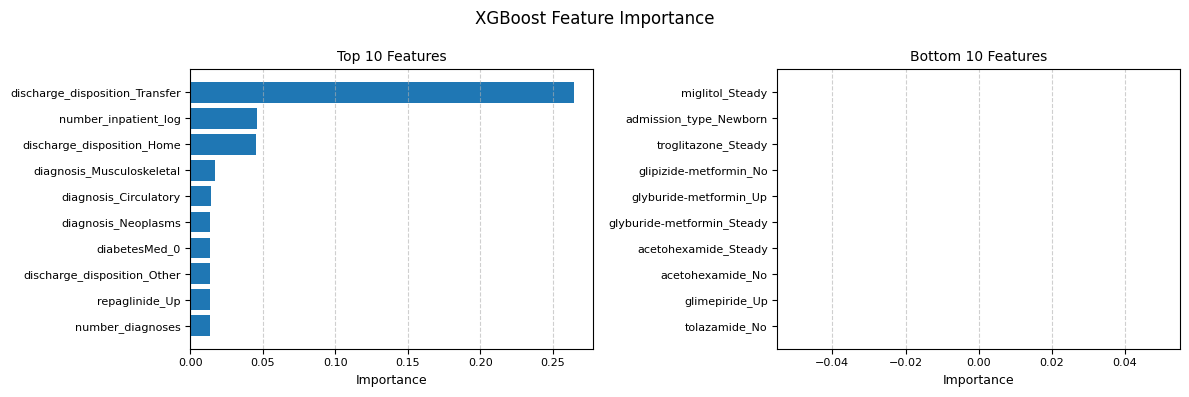


Top 10 Features:
discharge_disposition_Transfer: 0.2644
number_inpatient_log: 0.0460
discharge_disposition_Home: 0.0454
diagnosis_Musculoskeletal: 0.0168
diagnosis_Circulatory: 0.0141
diagnosis_Neoplasms: 0.0136
diabetesMed_0: 0.0135
discharge_disposition_Other: 0.0134
repaglinide_Up: 0.0134
number_diagnoses: 0.0133

Bottom 10 Features:
tolazamide_No: 0.0000
glimepiride_Up: 0.0000
acetohexamide_No: 0.0000
acetohexamide_Steady: 0.0000
glyburide-metformin_Steady: 0.0000
glyburide-metformin_Up: 0.0000
glipizide-metformin_No: 0.0000
troglitazone_Steady: 0.0000
admission_type_Newborn: 0.0000
miglitol_Steady: 0.0000


In [51]:
# Evaluate metrics for the best XGBoost model
metrics, best_model_fitted = evaluate_model(best_model_xgb,  
                                            X_train_preprocessed,
                                            y_train,
                                            X_test_preprocessed,
                                            y_test,
                                            results_df_xgb,
                                            best_params_xgb,
                                            optimal_thresholds_xgb,
                                            samplers,
                                            XGBClassifier)
# In the main loop:
plot_feature_importance(best_model_fitted, feature_names, 'XGBoost')

#### __4.2.4. LightGBM__

In [ ]:
## FOR LightGBM
results_lgbm = {}
best_params_lgbm = {}
optimal_thresholds_lgbm = {}

param_grid_lgbm = {
    'max_depth': [10, 20, 30, None],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

for sampler_name, sampler in samplers.items():
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_preprocessed, y_train)
    else:
        X_resampled, y_resampled = X_train_preprocessed, y_train
    
    grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid_lgbm, cv=3, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
    
    # Find optimal threshold
    optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    results_lgbm[f'Tuned Model with {sampler_name}'] = calculate_metrics(y_test, y_pred, y_pred_proba)
    best_params_lgbm[f'Tuned Model with {sampler_name}'] = grid_search.best_params_
    optimal_thresholds_lgbm[f'Tuned Model with {sampler_name}'] = optimal_threshold


In [53]:
# Convert optimized results to DataFrame
results_df_lgbm = pd.DataFrame(results_lgbm).T

# Find the best model based on Average Precision
best_lgbm_model = results_df_lgbm['Average Precision'].idxmax()



In [54]:
print("Results for all models (with optimized thresholds):")
print(results_df_lgbm)
print("\nBest Parameters and Optimal Thresholds for each model:")
for model in best_params_lgbm.keys():
    print(f"\n{model}:")
    print(f"  Optimal Threshold: {optimal_thresholds_lgbm[model]}")
    for param, value in best_params_lgbm[model].items():
        print(f"  {param}: {value}")

print(f"\nBest Overall Model: {best_lgbm_model}")
print("Best Parameters:")
for param, value in best_params_lgbm[best_lgbm_model].items():
    print(f"  {param}: {value}")
print(f"Optimal Threshold: {optimal_thresholds_lgbm[best_lgbm_model]}")
print("\nBest Model Performance:")
for metric, value in results_lgbm[best_lgbm_model].items():
    print(f"  {metric}: {value}")

Results for all models (with optimized thresholds):
                               Accuracy  Precision    Recall  F1 Score  \
Tuned Model with none          0.783183   0.175141  0.378049  0.239382   
Tuned Model with smote         0.758089   0.156530  0.382927  0.222222   
Tuned Model with random_under  0.785678   0.170370  0.355285  0.230303   
Tuned Model with adasyn        0.708343   0.144890  0.455285  0.219823   
Tuned Model with smotetomek    0.759850   0.157560  0.382114  0.223119   

                                    AUC  Average Precision  
Tuned Model with none          0.647980           0.162603  
Tuned Model with smote         0.630679           0.144690  
Tuned Model with random_under  0.637431           0.149872  
Tuned Model with adasyn        0.627501           0.143601  
Tuned Model with smotetomek    0.631760           0.144659  

Best Parameters and Optimal Thresholds for each model:

Tuned Model with none:
  Optimal Threshold: 0.12
  learning_rate: 0.01
  max_dep

Model: Tuned Model with none
Sampler: none
Optimal threshold: 0.12
Predicted probabilities range: 0.0288 to 0.5075
Number of positive predictions: 2655 out of 13629 total
Number of actual positive cases: 1230 out of 13629 total

Performance Metrics for the <lambda> Model:
 Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
   0.7832     0.1751  0.3780    0.2394   0.6480  0.1618


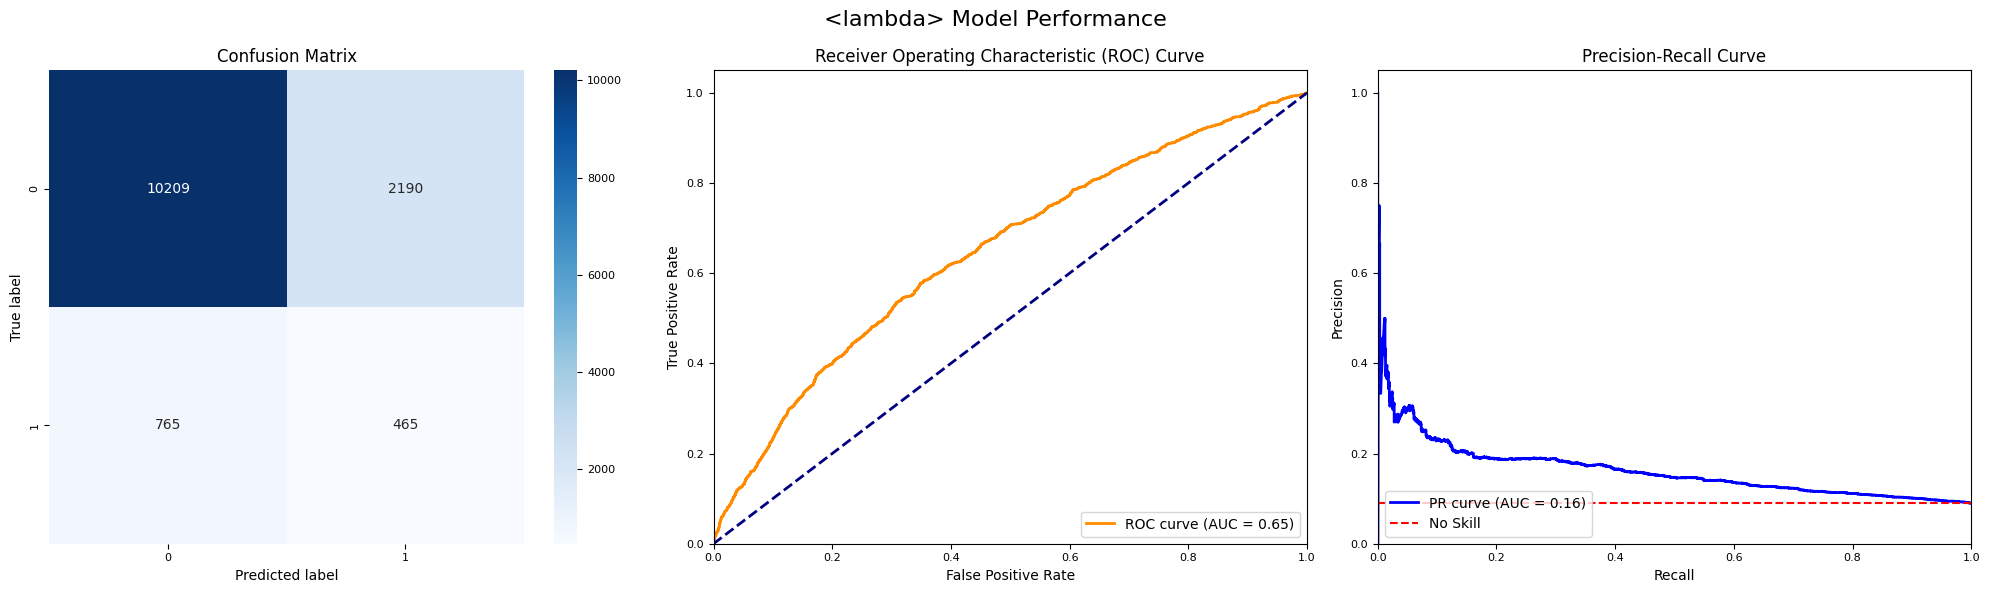

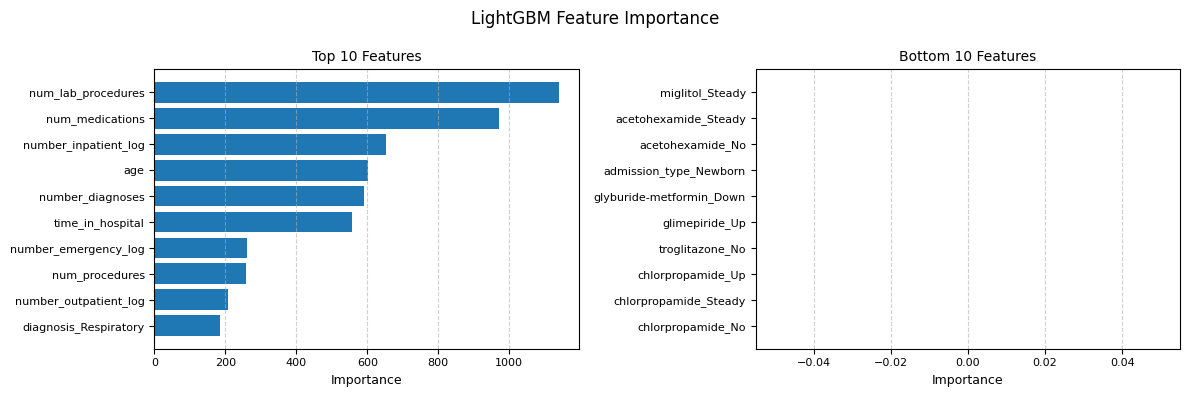


Top 10 Features:
num_lab_procedures: 1139.0000
num_medications: 972.0000
number_inpatient_log: 652.0000
age: 601.0000
number_diagnoses: 592.0000
time_in_hospital: 557.0000
number_emergency_log: 261.0000
num_procedures: 259.0000
number_outpatient_log: 207.0000
diagnosis_Respiratory: 184.0000

Bottom 10 Features:
chlorpropamide_No: 0.0000
chlorpropamide_Steady: 0.0000
chlorpropamide_Up: 0.0000
troglitazone_No: 0.0000
glimepiride_Up: 0.0000
glyburide-metformin_Down: 0.0000
admission_type_Newborn: 0.0000
acetohexamide_No: 0.0000
acetohexamide_Steady: 0.0000
miglitol_Steady: 0.0000


In [55]:
metrics, best_model_fitted = evaluate_model(best_lgbm_model,  # This is the name of the best model configuration
                                            X_train_preprocessed,
                                            y_train,
                                            X_test_preprocessed,
                                            y_test,
                                            results_df_lgbm,
                                            best_params_lgbm,
                                            optimal_thresholds_lgbm,
                                            samplers,
                                            lambda **kwargs: LGBMClassifier(verbose=-1, **kwargs))


# Feature Importance
plot_feature_importance(best_model_fitted, feature_names, 'LightGBM')

#### __4.2.5. CatBoost__   

In [ ]:
## FOR CatBoost
results_cat = {}
best_params_cat = {}
optimal_thresholds_cat = {}

param_grid_cat = {
    'max_depth': [10, 20, 30, None],
    'n_estimators': [100, 200, 300]
}

for sampler_name, sampler in samplers.items():
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_preprocessed, y_train)
    else:
        X_resampled, y_resampled = X_train_preprocessed, y_train
    
    grid_search = GridSearchCV(CatBoostClassifier(random_state=42), param_grid_cat, cv=3, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
    
    # Find optimal threshold
    optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    results_cat[f'Tuned Model with {sampler_name}'] = calculate_metrics(y_test, y_pred, y_pred_proba)
    best_params_cat[f'Tuned Model with {sampler_name}'] = grid_search.best_params_
    optimal_thresholds_cat[f'Tuned Model with {sampler_name}'] = optimal_threshold


In [57]:
#Convert optimized results to DataFrame
results_df_cat = pd.DataFrame(results_cat).T

# Find the best model based on Average Precision
best_model_cat = results_df_cat['Average Precision'].idxmax()


print("Results for all models (with optimized thresholds):")
print(results_df_cat)
print("\nBest Parameters and Optimal Thresholds for each model:")
for model in best_params_cat.keys():
    print(f"\n{model}:")
    print(f"  Optimal Threshold: {optimal_thresholds_cat[model]}")
    for param, value in best_params_cat[model].items():
        print(f"  {param}: {value}")

print(f"\nBest Overall Model: {best_model_cat}")
print("Best Parameters:")
for param, value in best_params_cat[best_model_cat].items():
    print(f"  {param}: {value}")
print(f"Optimal Threshold: {optimal_thresholds_cat[best_model_cat]}")
print("\nBest Model Performance:")
for metric, value in results_cat[best_model_cat].items():
    print(f"  {metric}: {value}")


Results for all models (with optimized thresholds):
                               Accuracy  Precision    Recall  F1 Score  \
Tuned Model with none          0.742094   0.153263  0.410569  0.223204   
Tuned Model with smote         0.690366   0.128479  0.420325  0.196802   
Tuned Model with random_under  0.743708   0.151953  0.401626  0.220486   
Tuned Model with adasyn        0.768728   0.146691  0.324390  0.202025   
Tuned Model with smotetomek    0.745763   0.135637  0.338211  0.193623   

                                    AUC  Average Precision  
Tuned Model with none          0.633580           0.145915  
Tuned Model with smote         0.590572           0.130292  
Tuned Model with random_under  0.634191           0.145003  
Tuned Model with adasyn        0.600779           0.133577  
Tuned Model with smotetomek    0.588698           0.130136  

Best Parameters and Optimal Thresholds for each model:

Tuned Model with none:
  Optimal Threshold: 0.11
  max_depth: None
  n_estimator

Model: Tuned Model with none
Sampler: none
Optimal threshold: 0.11
Predicted probabilities range: 0.0031 to 0.8165
Number of positive predictions: 3295 out of 13629 total
Number of actual positive cases: 1230 out of 13629 total

Performance Metrics for the <lambda> Model:
 Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
   0.7421     0.1533  0.4106    0.2232   0.6336  0.1455


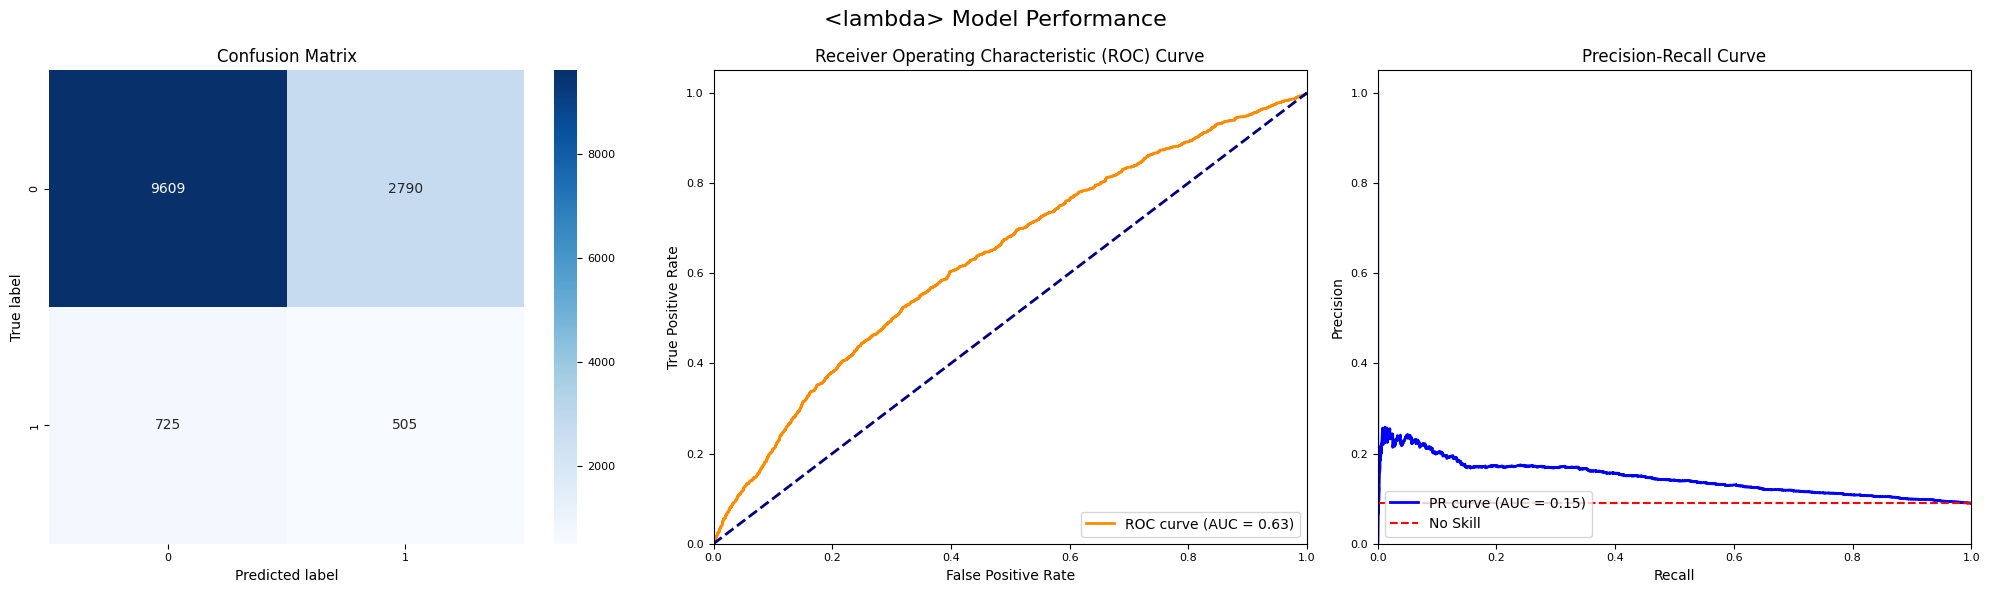

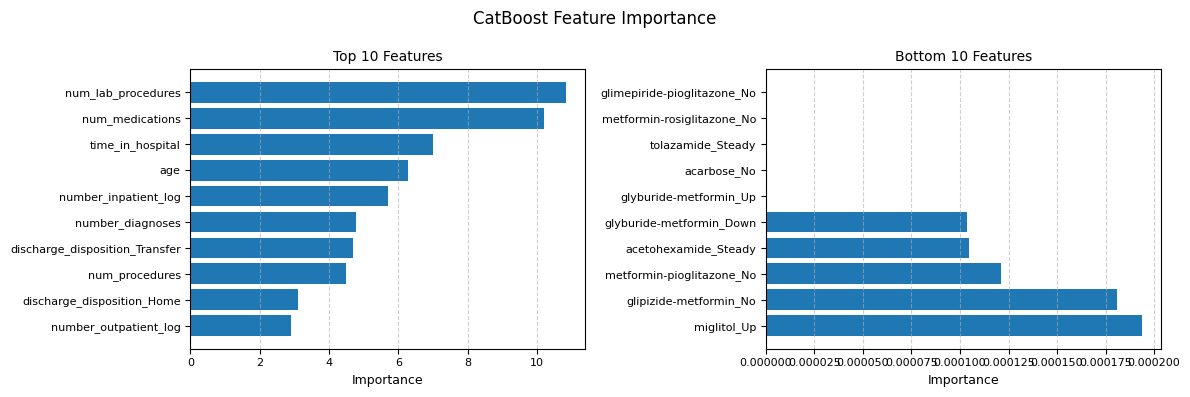


Top 10 Features:
num_lab_procedures: 10.8473
num_medications: 10.1921
time_in_hospital: 6.9932
age: 6.2891
number_inpatient_log: 5.7008
number_diagnoses: 4.7665
discharge_disposition_Transfer: 4.6899
num_procedures: 4.4913
discharge_disposition_Home: 3.1035
number_outpatient_log: 2.9077

Bottom 10 Features:
miglitol_Up: 0.0002
glipizide-metformin_No: 0.0002
metformin-pioglitazone_No: 0.0001
acetohexamide_Steady: 0.0001
glyburide-metformin_Down: 0.0001
glyburide-metformin_Up: 0.0000
acarbose_No: 0.0000
tolazamide_Steady: 0.0000
metformin-rosiglitazone_No: 0.0000
glimepiride-pioglitazone_No: 0.0000


In [58]:
# Evaluate metrics for the best CatBoost model
metrics, best_model_fitted = evaluate_model(best_model_cat,  
                                            X_train_preprocessed,
                                            y_train,
                                            X_test_preprocessed,
                                            y_test,
                                            results_df_cat,
                                            best_params_cat,
                                            optimal_thresholds_cat,
                                            samplers,
                                            lambda **kwargs: CatBoostClassifier(verbose=False, **kwargs))
# Feature Importance
plot_feature_importance(best_model_fitted, feature_names, 'CatBoost')

### 5. Model Performance Comparison

In [62]:
def compile_model_performances(model_results):
    performances = []
    for model_name, results in model_results.items():
        best_model = max(results.items(), key=lambda x: x[1]['Average Precision'])
        best_config = best_model[0]
        metrics = best_model[1]
        
        performances.append({
            'Model': model_name,
            'Best Configuration': best_config,
            'Average Precision': metrics['Average Precision'],
            'ROC AUC': metrics['AUC'],
            'F1 Score': metrics['F1 Score'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'Accuracy': metrics['Accuracy']
        })
    
    df = pd.DataFrame(performances)
    df = df.sort_values('Average Precision', ascending=False).reset_index(drop=True)
    
    return df

# Usage example:
model_results = {
    'Logistic Regression': results_logistic_regression,
    'Random Forest': results_random_forest,
    'XGBoost': results_xgb,
    'LightGBM': results_lgbm,
    'CatBoost': results_cat
}

performance_table = compile_model_performances(model_results)
performance_table

,Model,Best Configuration,Average Precision,ROC AUC,F1 Score,Precision,Recall,Accuracy
0,LightGBM,Tuned Model with none,0.162603,0.647980,0.239382,0.175141,0.378049,0.783183
1,XGBoost,Tuned Model with none,0.161747,0.645831,0.232558,0.159255,0.430894,0.743341
2,Random Forest,Tuned Model with random_under,0.154666,0.643787,0.232227,0.171729,0.358537,0.786044
3,Logistic Regression,Tuned Model with random_under,0.149105,0.635955,0.227000,0.148996,0.476423,0.707169
4,CatBoost,Tuned Model with none,0.145915,0.633580,0.223204,0.153263,0.410569,0.742094


### 6. Model Deployment

The best model with highest average precision is LightGBM with no sampling, hence we chose this model to deploy. Given that there are over 50 features, we will simplify the model by selecting the top 15 most important features and then compare the performance of the full model and the simplified model to justify the adequacy of the simplified model.

In [ ]:
# Creating final model
best_lgbm_model = results_df_lgbm['Average Precision'].idxmax()
final_model = LGBMClassifier(**best_params_lgbm[best_lgbm_model])
final_model.fit(X_train_preprocessed, y_train)
final_optimal_threshold = 0.12

y_pred_proba_final = final_model.predict_proba(X_test_preprocessed)[:, 1]
y_pred_final = (y_pred_proba_final >= final_optimal_threshold).astype(int)

In [111]:
# Getting the top 15 features to create a simplified model
feature_importances = final_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

original_features = preprocessor.feature_names_in_

def map_to_original_feature(preprocessed_feature):
    for original_feature in original_features:
        if original_feature in preprocessed_feature:
            return original_feature
    return preprocessed_feature

importance_df['original_feature'] = importance_df['feature'].apply(map_to_original_feature)
grouped_importance = importance_df.groupby('original_feature')['importance'].sum().sort_values(ascending=False)
top_features = grouped_importance.head(10).index.tolist()

print("Top 10 original features:")
print(top_features)


Top 10 original features:
['num_lab_procedures', 'diagnosis', 'num_medications', 'number_inpatient', 'age', 'number_diagnoses', 'time_in_hospital', 'discharge_disposition', 'admission_type', 'admission_source']


In [112]:
# Creating simplified_preprocessor
simplified_numerical_features = [f for f in top_features if f in numerical_features or f in ['number_inpatient', 'number_emergency', 'number_outpatient']]
simplified_categorical_features = [f for f in top_features if f in categorical_features]
simplified_binary_features = [f for f in top_features if f in binary_features]

simplified_preprocessor = ColumnTransformer(transformers=[
    ('binary', binary_encoder, simplified_binary_features),
    ('categorical', categorical_encoder, simplified_categorical_features),
    ('numerical', numerical_encoder, simplified_numerical_features)
])

In [113]:
# Create simplified datasets
X_train_simplified = X_train[top_features]
X_test_simplified = X_test[top_features]

# Fit and transform the training data
X_train_preprocessed_simplified = simplified_preprocessor.fit_transform(X_train_simplified)

# Transform the test data
X_test_preprocessed_simplified = simplified_preprocessor.transform(X_test_simplified)

In [ ]:
# Train the simplified model
simplified_model = LGBMClassifier(random_state=42, **best_params_lgbm[best_lgbm_model])
simplified_model.fit(X_train_preprocessed_simplified, y_train)

# Make predictions
y_pred_proba_simplified = simplified_model.predict_proba(X_test_preprocessed_simplified)[:, 1]
y_pred_simplified = (y_pred_proba_simplified >= final_optimal_threshold).astype(int)

In [115]:
def calculate_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_proba),
        'PR AUC': average_precision_score(y_true, y_pred_proba)
    }
metrics_full = calculate_metrics(y_test, y_pred_final, y_pred_proba_final)
metrics_simplified = calculate_metrics(y_test, y_pred_simplified, y_pred_proba_simplified)

metrics_comparison = pd.DataFrame({
    'Full Model': metrics_full,
    'Simplified Model': metrics_simplified
})

# Calculate the difference and percentage change
metrics_comparison['Absolute Difference'] = metrics_comparison['Simplified Model'] - metrics_comparison['Full Model']
metrics_comparison['Percentage Change'] = ((metrics_comparison['Simplified Model'] - metrics_comparison['Full Model']) / metrics_comparison['Full Model']) * 100

# Round the results for better readability
metrics_comparison = metrics_comparison.round(4)

print("Model Performance Comparison:")
metrics_comparison


Model Performance Comparison:


,Full Model,Simplified Model,Absolute Difference,Percentage Change
Accuracy,0.7832,0.7756,-0.0076,-0.9743
Precision,0.1751,0.1676,-0.0076,-4.3198
Recall,0.3780,0.3748,-0.0033,-0.8602
F1 Score,0.2394,0.2316,-0.0078,-3.2509
ROC AUC,0.6480,0.6408,-0.0072,-1.1087
PR AUC,0.1626,0.1553,-0.0073,-4.4828


Since there is no significant difference between the performance of the full model and the simplified model, we can use the simplified model for deployment.

In [118]:
import pickle

# Save the preprocessor
with open('simplified_preprocessor.pkl', 'wb') as f:
    pickle.dump(simplified_preprocessor, f)

# Save the model
with open('simplified_lightgbm_model.pkl', 'wb') as f:
    pickle.dump(simplified_model, f)

# Save the list of features
with open('simplified_features.pkl', 'wb') as f:
    pickle.dump(top_features, f)

# Save the optimal threshold
with open('optimal_threshold.pkl', 'wb') as f:
    pickle.dump({'optimal_threshold': optimal_threshold}, f)